In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.interpolate import make_interp_spline

In [ ]:
# reading interview task_msi_file
df = pd.read_csv('Test_MSI_data.csv')

In [ ]:
#filtering the dup-licates from data
df =df.drop_duplicates(subset = 'date')

In [ ]:
#looking for miss values
df['date'].isna().sum().sum()

0

In [ ]:
#filtering data frame from expected cloud cover
df = df[df['QA60']==0]

In [ ]:
#viewing dataframe
df

In [ ]:
#NDVI dataframe extraction
df['NDVI'] = (df['NIR']-df['RED'])/(df['NIR']+df['RED'])

#GNDVI dataframe extraction
df['GNDVI'] = (df['NIR']-df['GREEN'])/(df['NIR']+df['GREEN'])


In [ ]:
#SAVI dataframe extraction
L = 1- df['NDVI']
df['SAVI'] = ((df['NIR']-df['RED'])/(df['NIR']+df['RED']+L))*(1+L)

In [1]:
#sorting dataframe wrt dates
df['date'] = pd.to_datetime(df['date'])
df =df.sort_values(by='date').reset_index(drop=True)

NameError: ignored

In [ ]:
#viewing dataframe
df

GREEN          RED          NIR  QA60       date      NDVI  \
0     941.842981   844.453782  2461.751110   0.0 2017-01-03  0.489170   
1    1050.062566   969.647211  1898.885444   0.0 2017-01-11  0.323942   
2     931.772826   842.179866  1851.918705   0.0 2017-02-10  0.374797   
3    1115.418665  1022.579075  1946.595302   0.0 2017-03-11  0.311203   
4     979.806329   947.905465  2555.773230   0.0 2017-03-21  0.458908   
..           ...          ...          ...   ...        ...       ...   
321  1089.780657   992.404698  2759.185356   0.0 2021-10-03  0.470942   
322  2566.368935  2676.572455  2987.263664   0.0 2021-10-07  0.054855   
323   996.135061   854.833858  1545.461694   0.0 2021-11-01  0.287726   
324  1724.150965  2061.511585  2619.400339   0.0 2021-11-05  0.119184   
325  1182.870590  1041.101074  3088.039961   0.0 2021-12-03  0.495730   

        GNDVI      SAVI  
0    0.446560  0.738939  
1    0.287839  0.542818  
2    0.330549  0.608979  
3    0.271448  0.525437  
4    0.445745  0.707111  
..        ...       ...  
321  0.433728  0.719996  
322  0.075787  0.106684  
323  0.216134  0.492520  
324  0.206110  0.224121  
325  0.446080  0.745621  

[326 rows x 8 columns]

In [ ]:
#viewing date format
df.date

0     2017-01-03
1     2017-01-11
2     2017-02-10
3     2017-03-11
4     2017-03-21
         ...    
321   2021-10-03
322   2021-10-07
323   2021-11-01
324   2021-11-05
325   2021-12-03
Name: date, Length: 326, dtype: datetime64[ns]

In [ ]:
#creating year wise dataframes

df_a2017 = df.loc[(df['date'] >= '2017-01-01')
                     & (df['date'] < '2018-01-01')]
df_2017 = df_a2017[df['NDVI']>=0] #excluding the probable outlier

df_2018 = df.loc[(df['date'] >= '2018-01-01')
                     & (df['date'] < '2019-01-01')]

df_2019 = df.loc[(df['date'] >= '2019-01-01')
                     & (df['date'] < '2020-01-01')]

df_2020 = df.loc[(df['date'] >= '2020-01-01')
                     & (df['date'] < '2021-01-01')]

df_2021 = df.loc[(df['date'] >= '2021-01-01')
                     & (df['date'] < '2022-01-01')]                     

C:\Users\Varun\AppData\Local\Temp\ipykernel_10788\2015700693.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2017 = df_a2017[df['NDVI']>=0] #excluding the probable outlier


In [ ]:
#viewing dataframe for 2017
df_2017

GREEN          RED          NIR  QA60       date      NDVI  \
0    941.842981   844.453782  2461.751110   0.0 2017-01-03  0.489170   
1   1050.062566   969.647211  1898.885444   0.0 2017-01-11  0.323942   
2    931.772826   842.179866  1851.918705   0.0 2017-02-10  0.374797   
3   1115.418665  1022.579075  1946.595302   0.0 2017-03-11  0.311203   
4    979.806329   947.905465  2555.773230   0.0 2017-03-21  0.458908   
5   1309.812626  1475.842254  2649.168967   0.0 2017-04-17  0.284442   
6   1195.129410  1428.299185  2242.187616   0.0 2017-04-30  0.221739   
7   1215.125050  1445.366594  1842.849600   0.0 2017-05-20  0.120881   
8   1335.014370  1475.686445  1707.948494   0.0 2017-05-27  0.072955   
9   1087.183822  1050.861710  1684.704771   0.0 2017-06-12  0.231704   
10  1388.831033  1754.056349  2751.519900   0.0 2017-07-05  0.221384   
11  1036.189392   894.334141  1927.647776   0.0 2017-07-10  0.366166   
13  1181.322677  1064.166223  1694.392266   0.0 2017-08-12  0.228462   
14  1314.983854   990.080003  3371.594575   0.0 2017-08-23  0.546009   
15  1056.458868   921.110842  2338.705094   0.0 2017-09-02  0.434869   
16  1183.423186   961.481069  2452.507387   0.0 2017-09-24  0.436740   
17  1081.598127  1148.384193  2357.235085   0.0 2017-10-04  0.344832   
18  1034.393638   915.484863  1959.553887   0.0 2017-10-22  0.363150   
19   998.744975   926.141358  1868.496085   0.0 2017-10-27  0.337201   
20   913.310729   854.850246  1521.601679   0.0 2017-11-12  0.280566   
21  1183.069347  1103.838298  1846.649794   0.0 2017-11-16  0.251759   
22  1408.348430  1264.708565  1904.925002   0.0 2017-11-21  0.201984   
23  1119.628804  1123.824574  2049.842981   0.0 2017-12-21  0.291782   
24  1002.091709   995.674094  1854.766368   0.0 2017-12-28  0.301389   
25  1089.314927  1057.890207  1924.059902   0.0 2017-12-31  0.290471   

       GNDVI      SAVI  
0   0.446560  0.738939  
1   0.287839  0.542818  
2   0.330549  0.608979  
3   0.271448  0.525437  
4   0.445745  0.707111  
5   0.338308  0.487892  
6   0.304615  0.394226  
7   0.205275  0.227089  
8   0.122556  0.140547  
9   0.215565  0.409607  
10  0.329124  0.393689  
11  0.300778  0.598120  
13  0.178415  0.404616  
14  0.438830  0.793810  
15  0.377668  0.680509  
16  0.349040  0.682626  
17  0.370951  0.570649  
18  0.309010  0.594290  
19  0.303341  0.560565  
20  0.249820  0.482269  
21  0.219024  0.440024  
22  0.149875  0.363080  
23  0.293492  0.498316  
24  0.298466  0.511818  
25  0.277013  0.496450

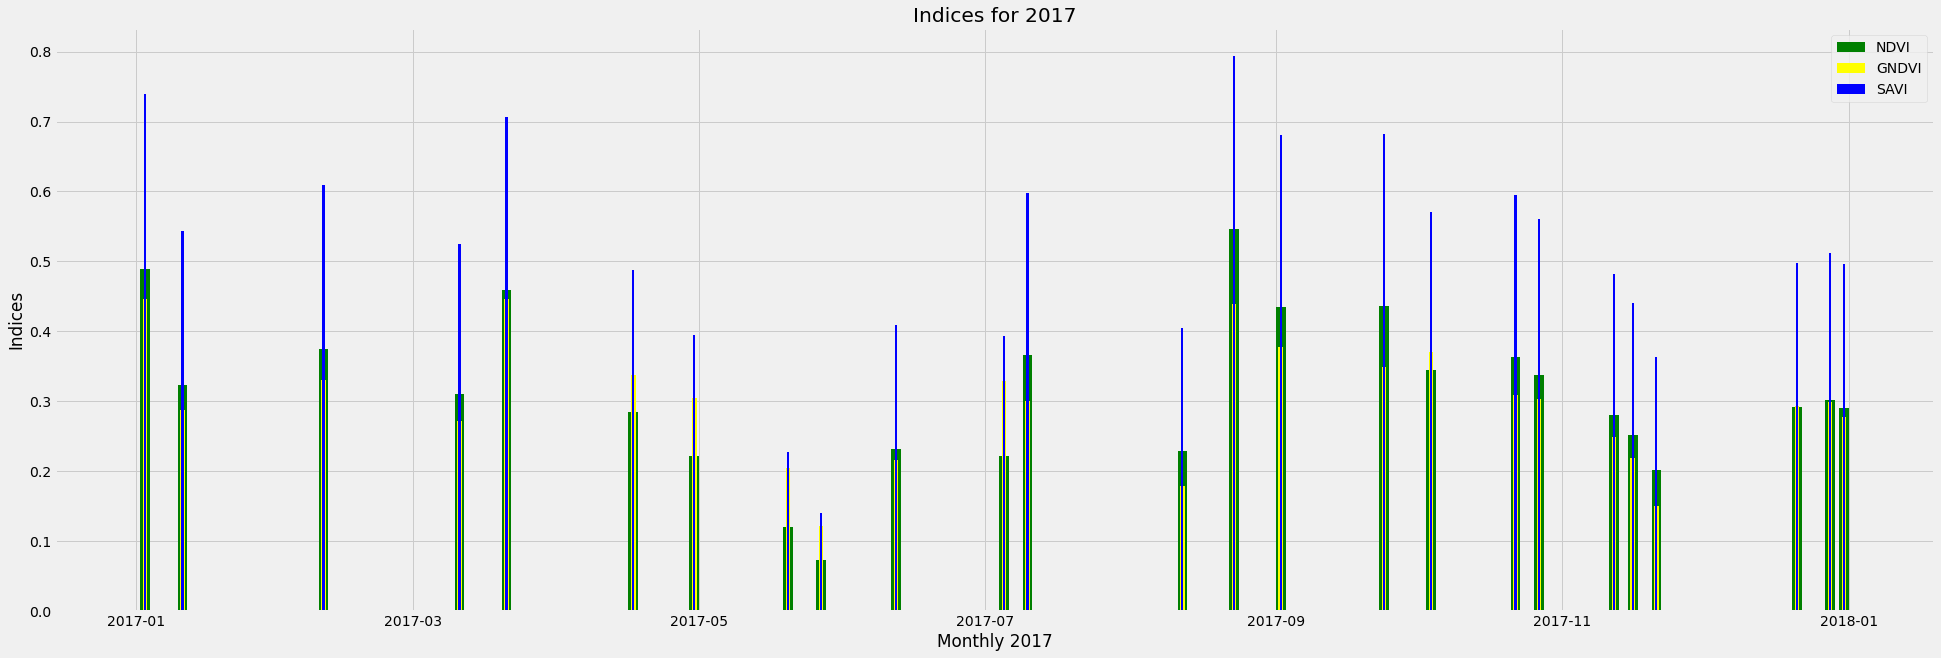

In [ ]:
#bar chart plot for NDVI, GNDVI, SAVI Indices 2017
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
plt.bar(df_2017['date'], df_2017['NDVI'],  color ='green', width = 2, label = 'NDVI' )
plt.bar(df_2017['date'], df_2017['GNDVI'],  color ='yellow', width = 1, label = 'GNDVI')
plt.bar(df_2017['date'], df_2017['SAVI'],  color ='blue', width = 0.5, label = 'SAVI')

plt.xlabel("Monthly 2017")
plt.ylabel("Indices")
plt.legend()
plt.title("Indices for 2017")
plt.show()


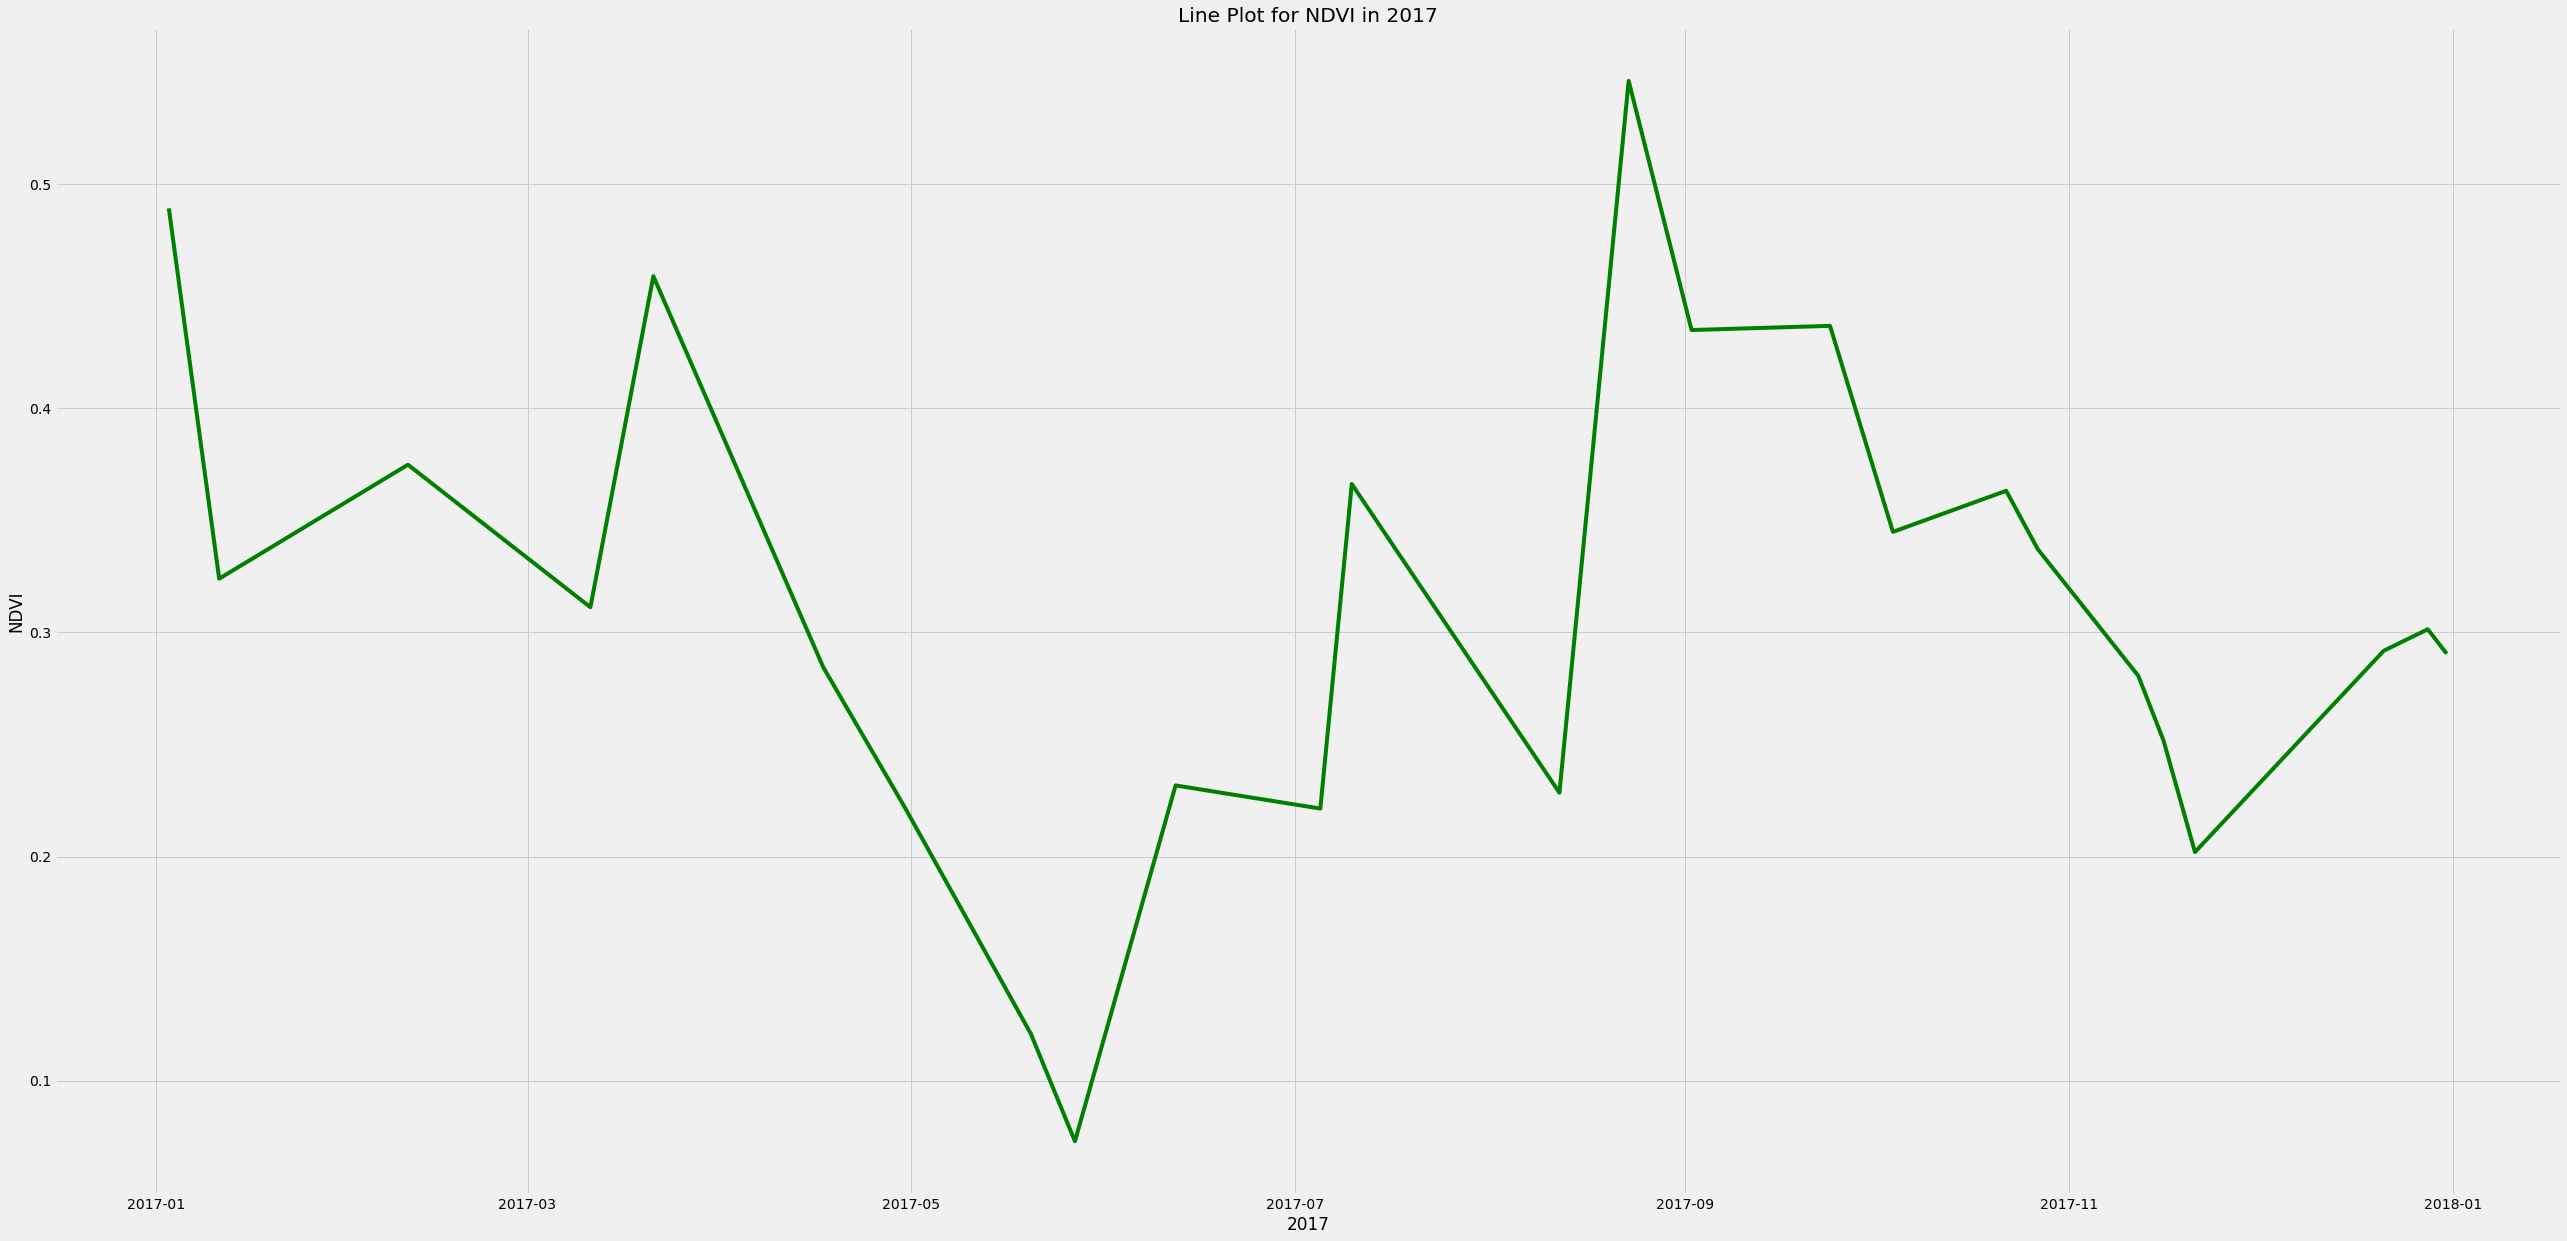

In [ ]:
#Line plot for ndvi 2017
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2017['date'], df_2017['NDVI'], color='green')

ax.set(xlabel="2017", ylabel="NDVI", title="Line Plot for NDVI in 2017")

plt.show()

In [ ]:
#viewing dataframe for 2018
df_2018

GREEN          RED          NIR  QA60       date      NDVI  \
26   1169.374102  1236.327521  1506.378946   0.0 2018-01-03  0.098462   
27    974.496408   833.232340  1821.923549   0.0 2018-01-12  0.372367   
28   1130.423831  1086.080730  1942.151126   0.0 2018-01-15  0.282696   
29   1085.469767  1074.418423  2398.227012   0.0 2018-01-17  0.381210   
30    973.231937   980.298297  2182.768467   0.0 2018-01-20  0.380160   
..           ...          ...          ...   ...        ...       ...   
105  1026.514249   907.896666  2162.154840   0.0 2018-12-18  0.408546   
106   891.935901   813.765480  1967.786227   0.0 2018-12-21  0.414884   
107  1015.773714   900.797126  2137.944700   0.0 2018-12-23  0.407125   
108   927.613546   837.153387  1866.757003   0.0 2018-12-26  0.380783   
109   878.975700   829.732784  1875.745136   0.0 2018-12-31  0.386628   

        GNDVI      SAVI  
26   0.125948  0.187167  
27   0.303040  0.605933  
28   0.264185  0.485361  
29   0.376829  0.616990  
30   0.383250  0.615677  
..        ...       ...  
105  0.356149  0.650057  
106  0.376208  0.657501  
107  0.355825  0.648373  
108  0.336084  0.616429  
109  0.361840  0.623633  

[84 rows x 8 columns]

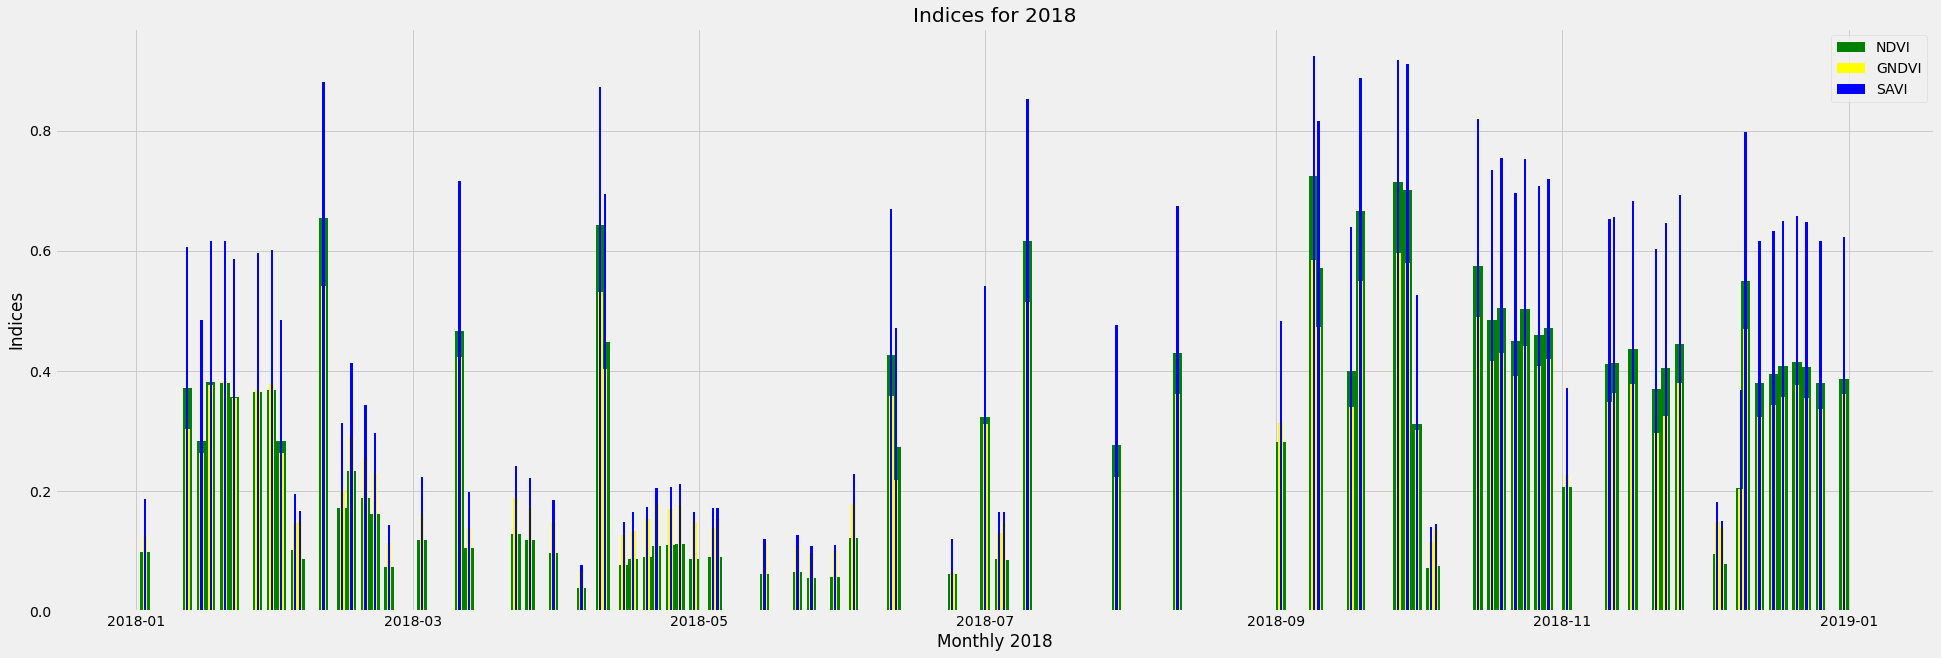

In [ ]:
#bar chart plot for NDVI, GNDVI, SAVI Indices 2018
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
plt.bar(df_2018['date'], df_2018['NDVI'],  color ='green', width = 2, label = 'NDVI')
plt.bar(df_2018['date'], df_2018['GNDVI'],  color ='yellow', width = 1, label = 'GNDVI')
plt.bar(df_2018['date'], df_2018['SAVI'],  color ='blue', width = 0.5, label = 'SAVI')

plt.xlabel("Monthly 2018")
plt.ylabel("Indices")
plt.legend()
plt.title("Indices for 2018")
plt.show()

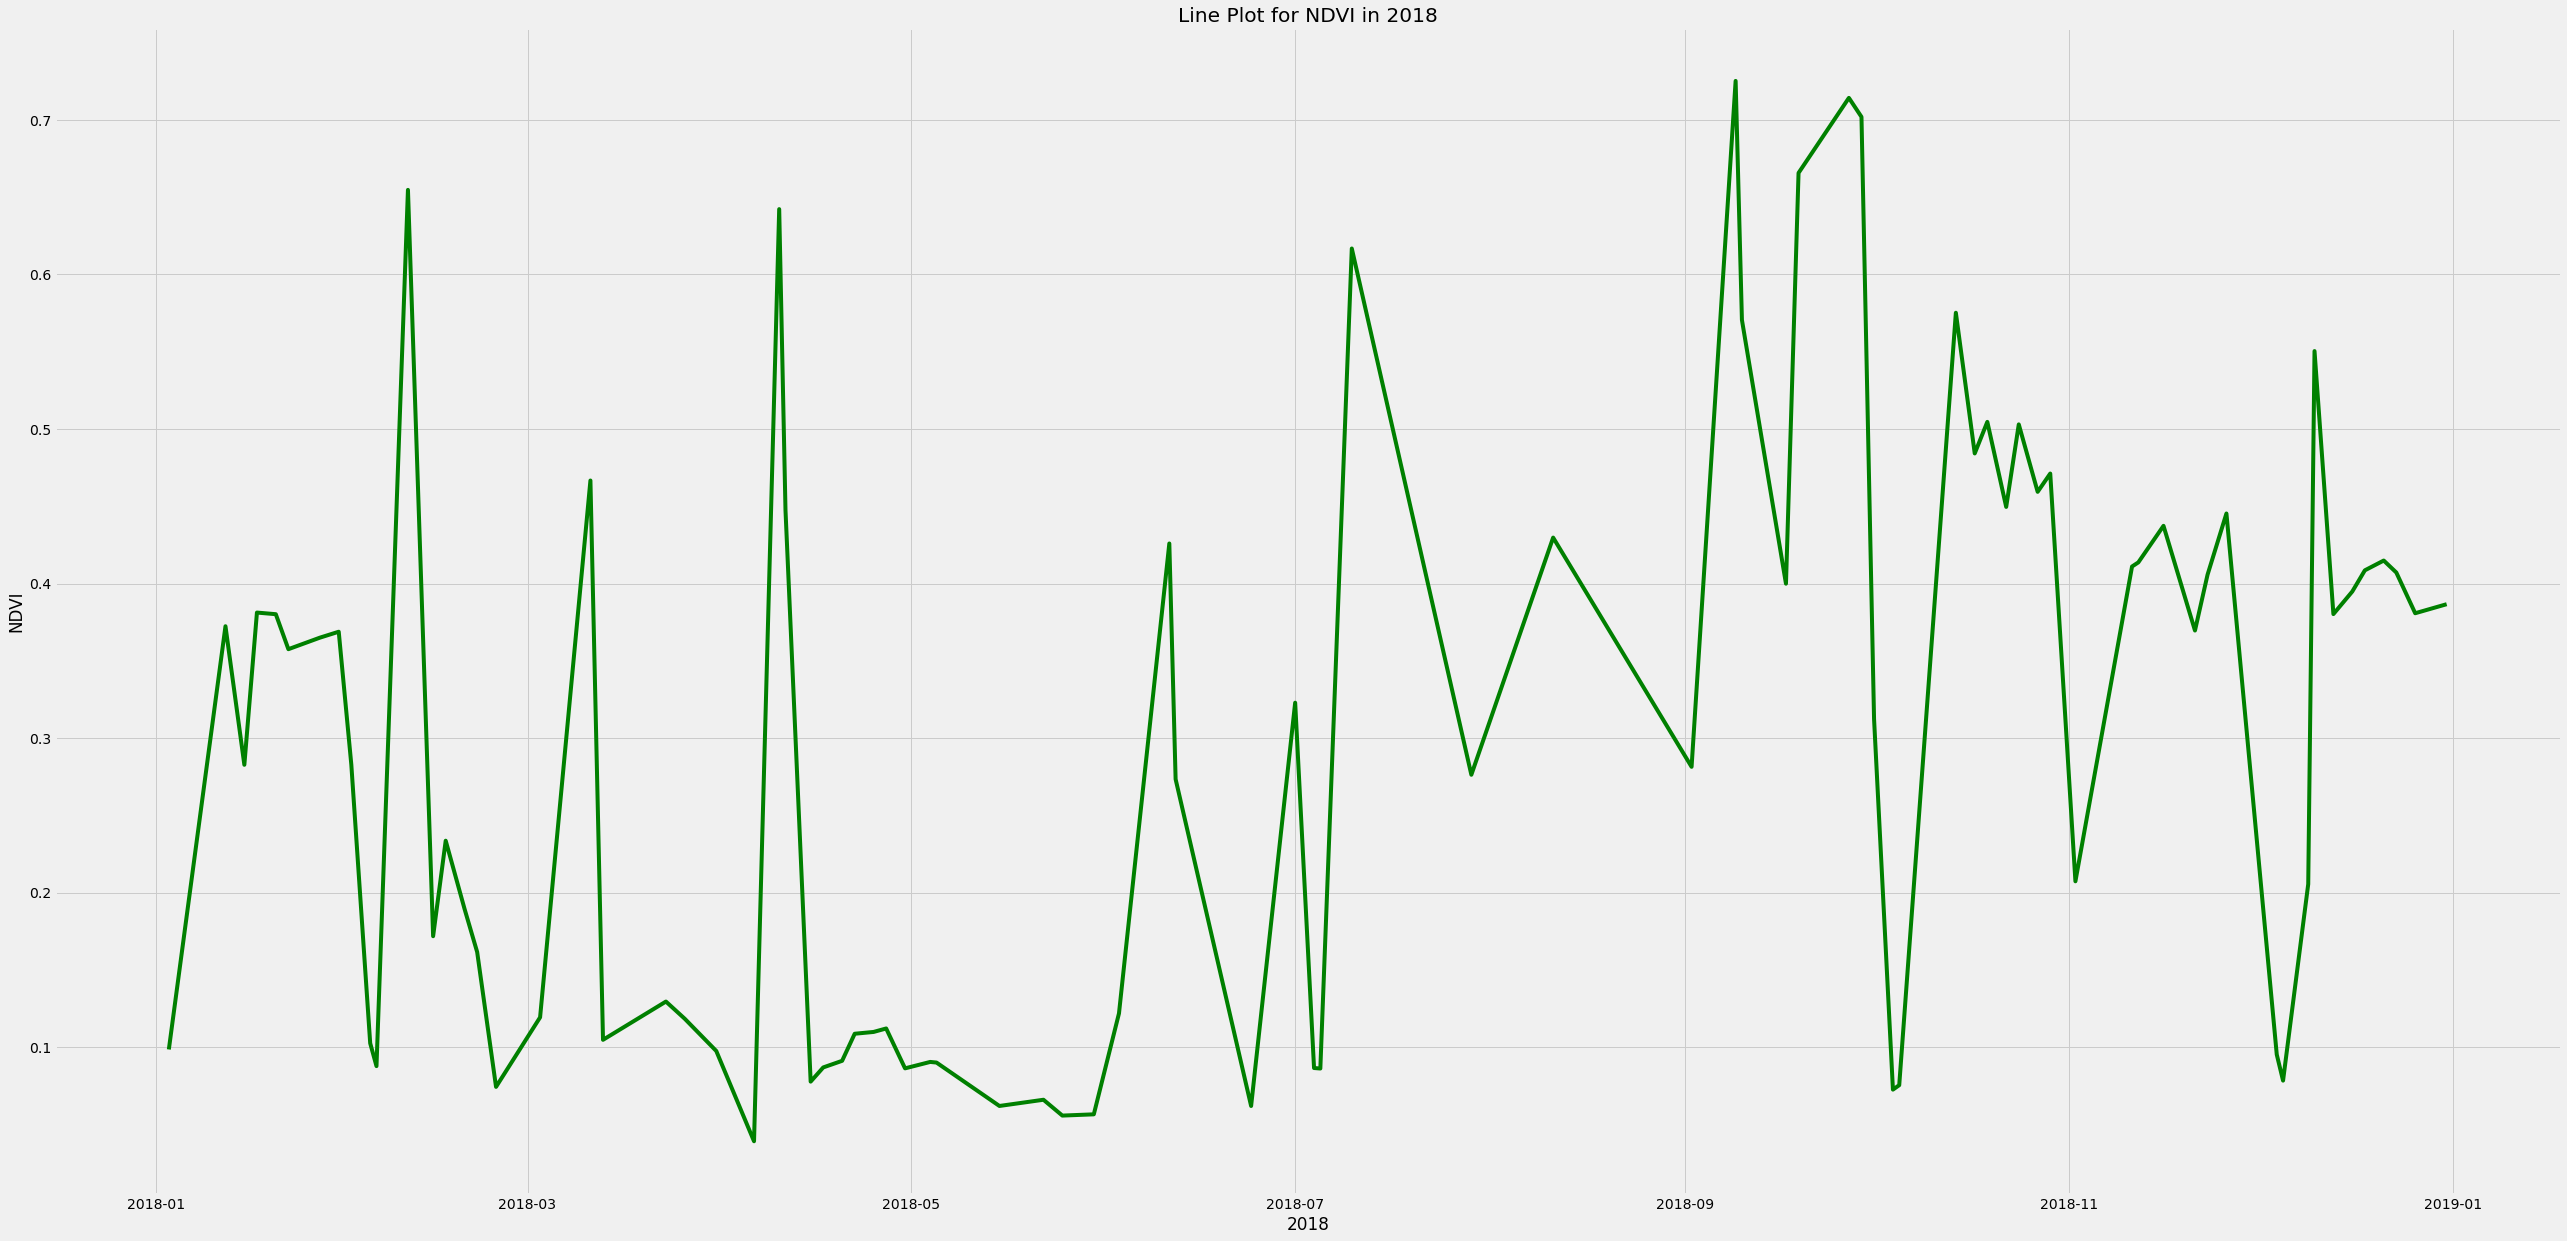

In [ ]:
#Line plot for ndvi 2018
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2018['date'], df_2018['NDVI'], color='green')

ax.set(xlabel="2018", ylabel="NDVI", title="Line Plot for NDVI in 2018")

plt.show()

In [ ]:
#viewing dataframe for 2019
df_2019

GREEN          RED          NIR  QA60       date      NDVI  \
110  1216.657544  1199.621297  1963.785339   0.0 2019-01-02  0.241564   
111   999.476548  1111.446194  1762.174457   0.0 2019-01-03  0.226449   
112  1376.105514  1472.293776  1642.633325   0.0 2019-01-06  0.054685   
113  1312.070235  1263.589489  1863.335352   0.0 2019-01-15  0.191801   
114  1120.292242  1077.424477  2012.907968   0.0 2019-01-17  0.302713   
..           ...          ...          ...   ...        ...       ...   
184  1238.752725  1170.203520  1936.380802   0.0 2019-12-01  0.246630   
185  1263.352466  1514.127795  2079.474610   0.0 2019-12-04  0.157320   
186  1212.727295  1339.721321  1587.498022   0.0 2019-12-05  0.084646   
187  1136.137241   798.451522  2696.730766   0.0 2019-12-10  0.543113   
188  1550.086300  1380.941875  1805.201340   0.0 2019-12-26  0.133158   

        GNDVI      SAVI  
110  0.234913  0.424672  
111  0.276175  0.401511  
112  0.088291  0.106347  
113  0.173605  0.346724  
114  0.284889  0.513675  
..        ...       ...  
184  0.219716  0.432329  
185  0.244141  0.289823  
186  0.133836  0.162076  
187  0.407161  0.791151  
188  0.076034  0.248517  

[79 rows x 8 columns]

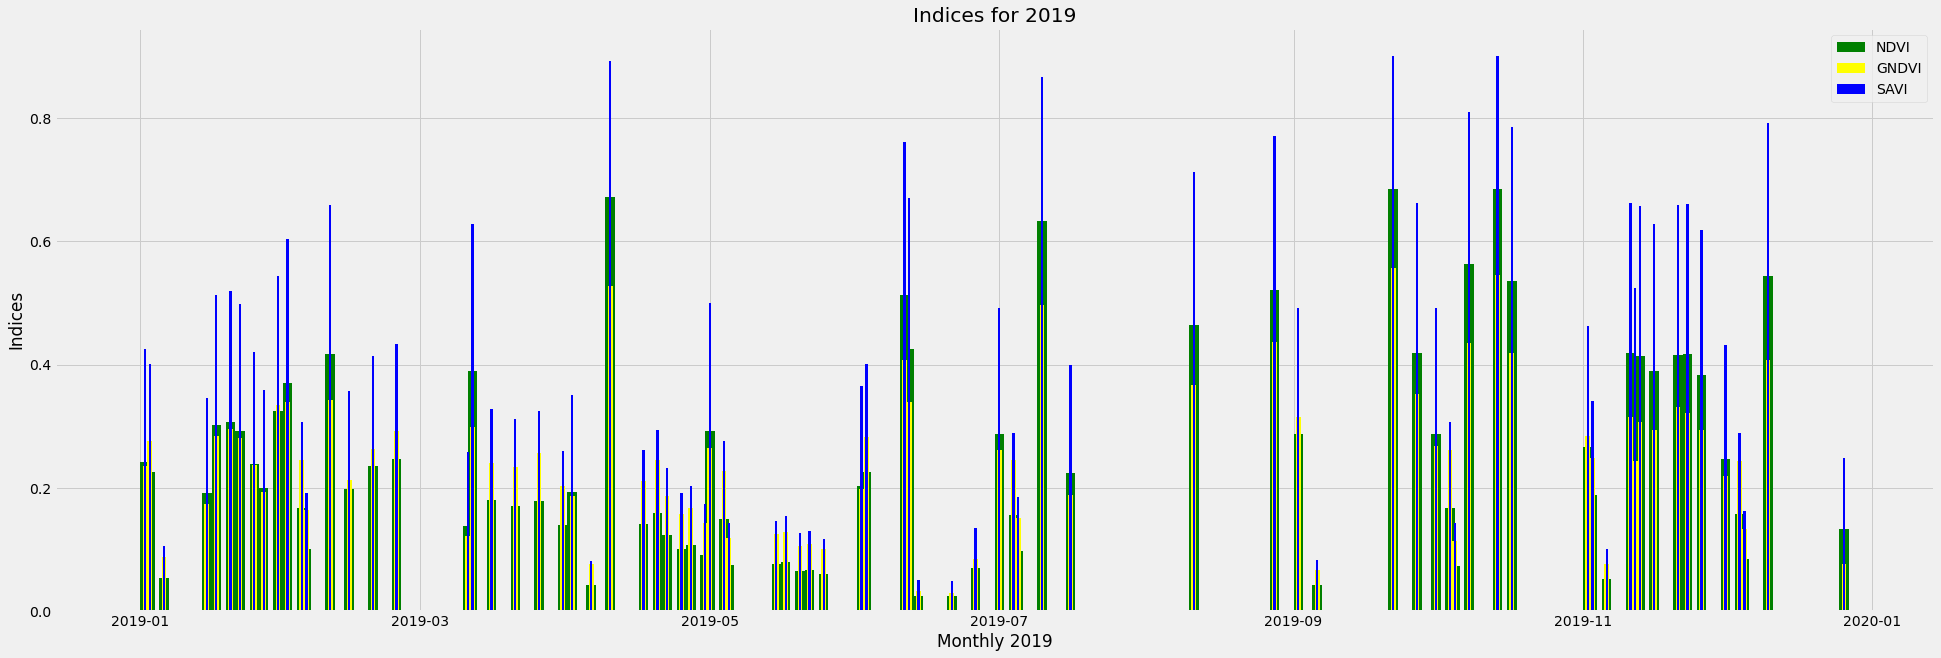

In [ ]:
#bar chart plot for NDVI, GNDVI, SAVI Indices 2019
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
plt.bar(df_2019['date'], df_2019['NDVI'],  color ='green', width = 2, label = 'NDVI')
plt.bar(df_2019['date'], df_2019['GNDVI'],  color ='yellow', width = 1, label = 'GNDVI')
plt.bar(df_2019['date'], df_2019['SAVI'],  color ='blue', width = 0.5, label = 'SAVI')

plt.xlabel("Monthly 2019")
plt.ylabel("Indices")
plt.legend()
plt.title("Indices for 2019")
plt.show()

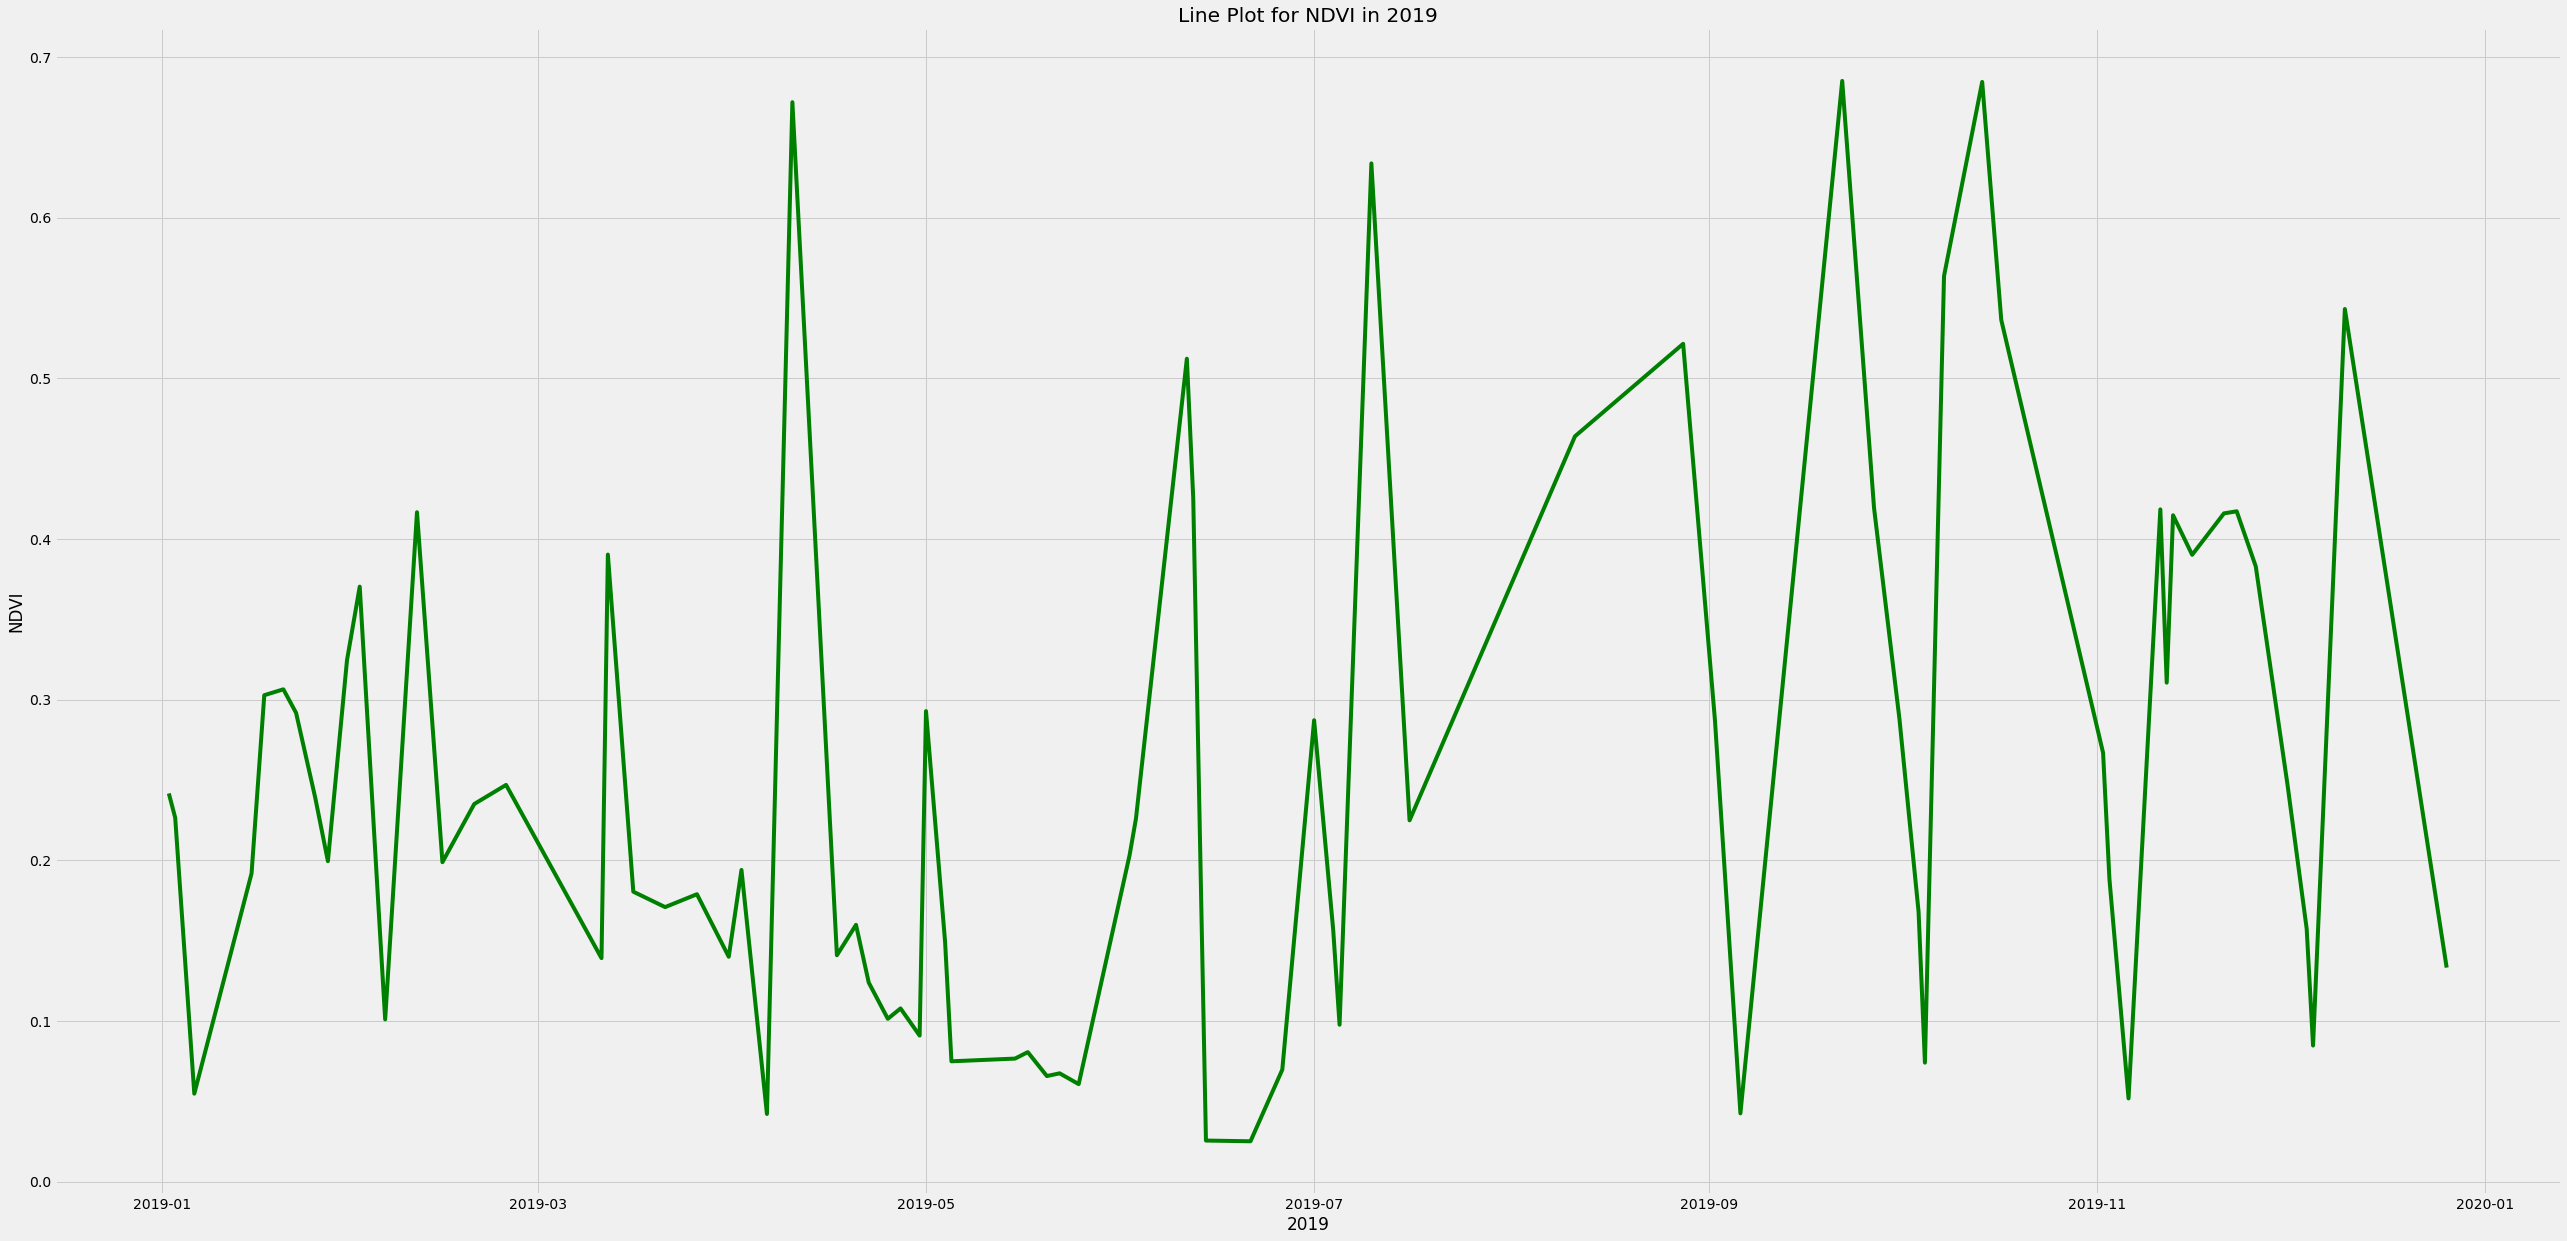

In [ ]:
#Line plot for ndvi 2019
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2019['date'], df_2019['NDVI'], color='green')

ax.set(xlabel="2019", ylabel="NDVI", title="Line Plot for NDVI in 2019")

plt.show()

In [ ]:
#viewing dataframe for 2020
df_2020

GREEN          RED          NIR  QA60       date      NDVI  \
189  1667.305724  1977.853556  3141.493098   0.0 2020-01-05  0.227302   
190  1379.971179  1086.489788  2658.441915   0.0 2020-01-10  0.419755   
191  1199.653831  1052.803907  1638.417938   0.0 2020-01-15  0.217602   
192  1152.416969   992.847421  1759.876483   0.0 2020-01-20  0.278644   
193   645.357310   456.149350   710.184387   0.0 2020-01-25  0.217806   
..           ...          ...          ...   ...        ...       ...   
260  1686.544200  1508.642932  1957.153387   0.0 2020-12-17  0.129411   
261   866.146525   828.901590  1276.080568   0.0 2020-12-20  0.212438   
262   937.646081   893.014451  1273.121014   0.0 2020-12-25  0.175477   
263  1136.808913  1050.507306  1485.719545   0.0 2020-12-27  0.171598   
264  1378.311213  1256.440704  1616.510374   0.0 2020-12-30  0.125331   

        GNDVI      SAVI  
189  0.306560  0.402878  
190  0.316578  0.663212  
191  0.154599  0.387740  
192  0.208585  0.479519  
193  0.047824  0.387913  
..        ...       ...  
260  0.074268  0.242013  
261  0.191359  0.379605  
262  0.151746  0.320040  
263  0.133044  0.313648  
264  0.079537  0.234883  

[76 rows x 8 columns]

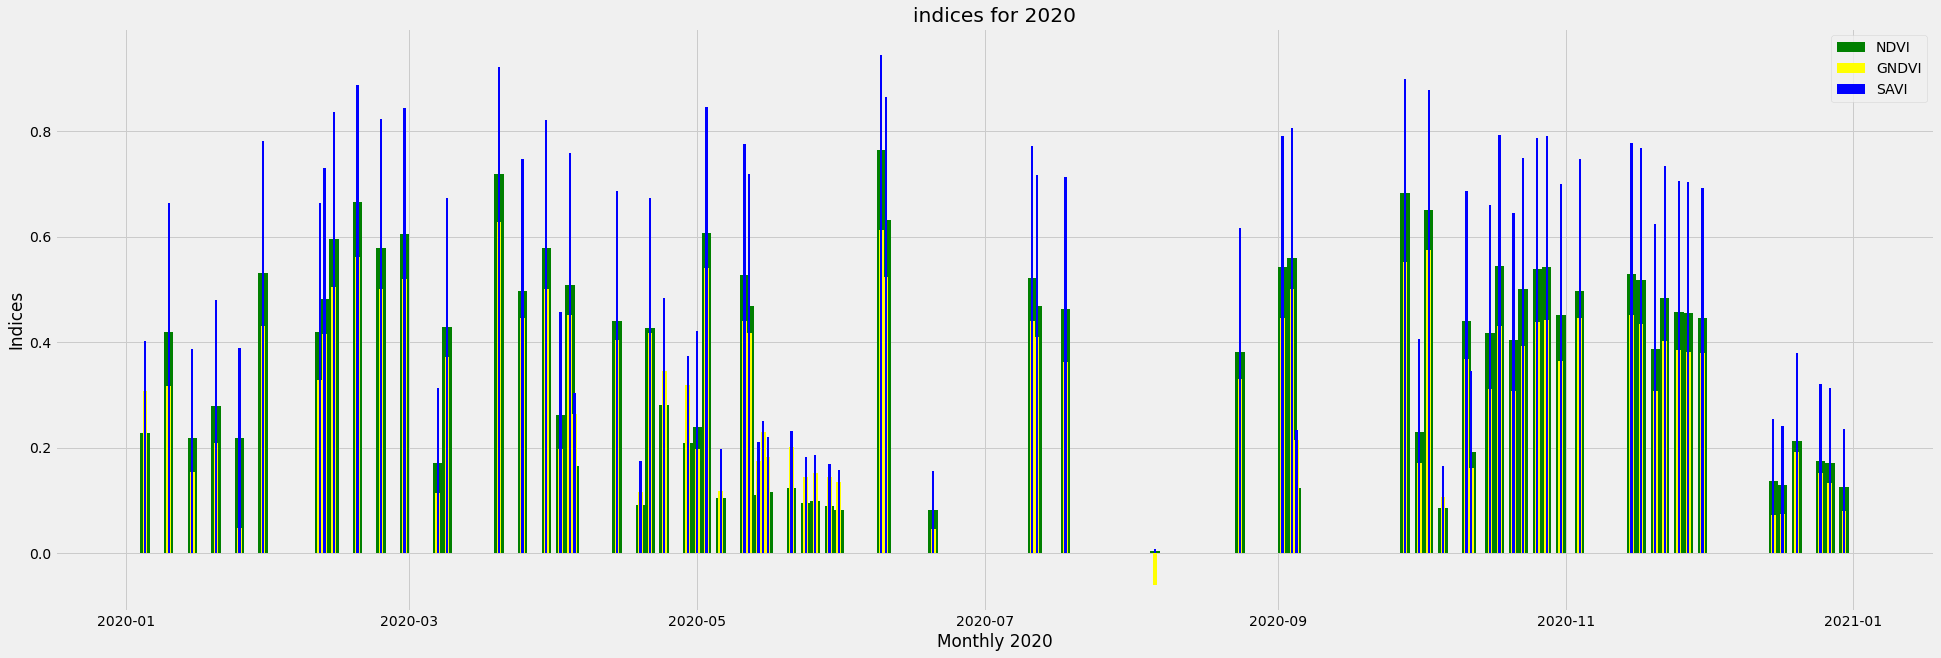

In [ ]:
#bar chart plot for NDVI, GNDVI, SAVI Indices 2020
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))

plt.bar(df_2020['date'], df_2020['NDVI'],  color ='green', width = 2, label = 'NDVI')
plt.bar(df_2020['date'], df_2020['GNDVI'],  color ='yellow', width = 1, label = 'GNDVI')
plt.bar(df_2020['date'], df_2020['SAVI'],  color ='blue', width = 0.5, label = 'SAVI')

plt.xlabel("Monthly 2020")
plt.ylabel("Indices")
plt.legend()
plt.title("indices for 2020")
plt.show()

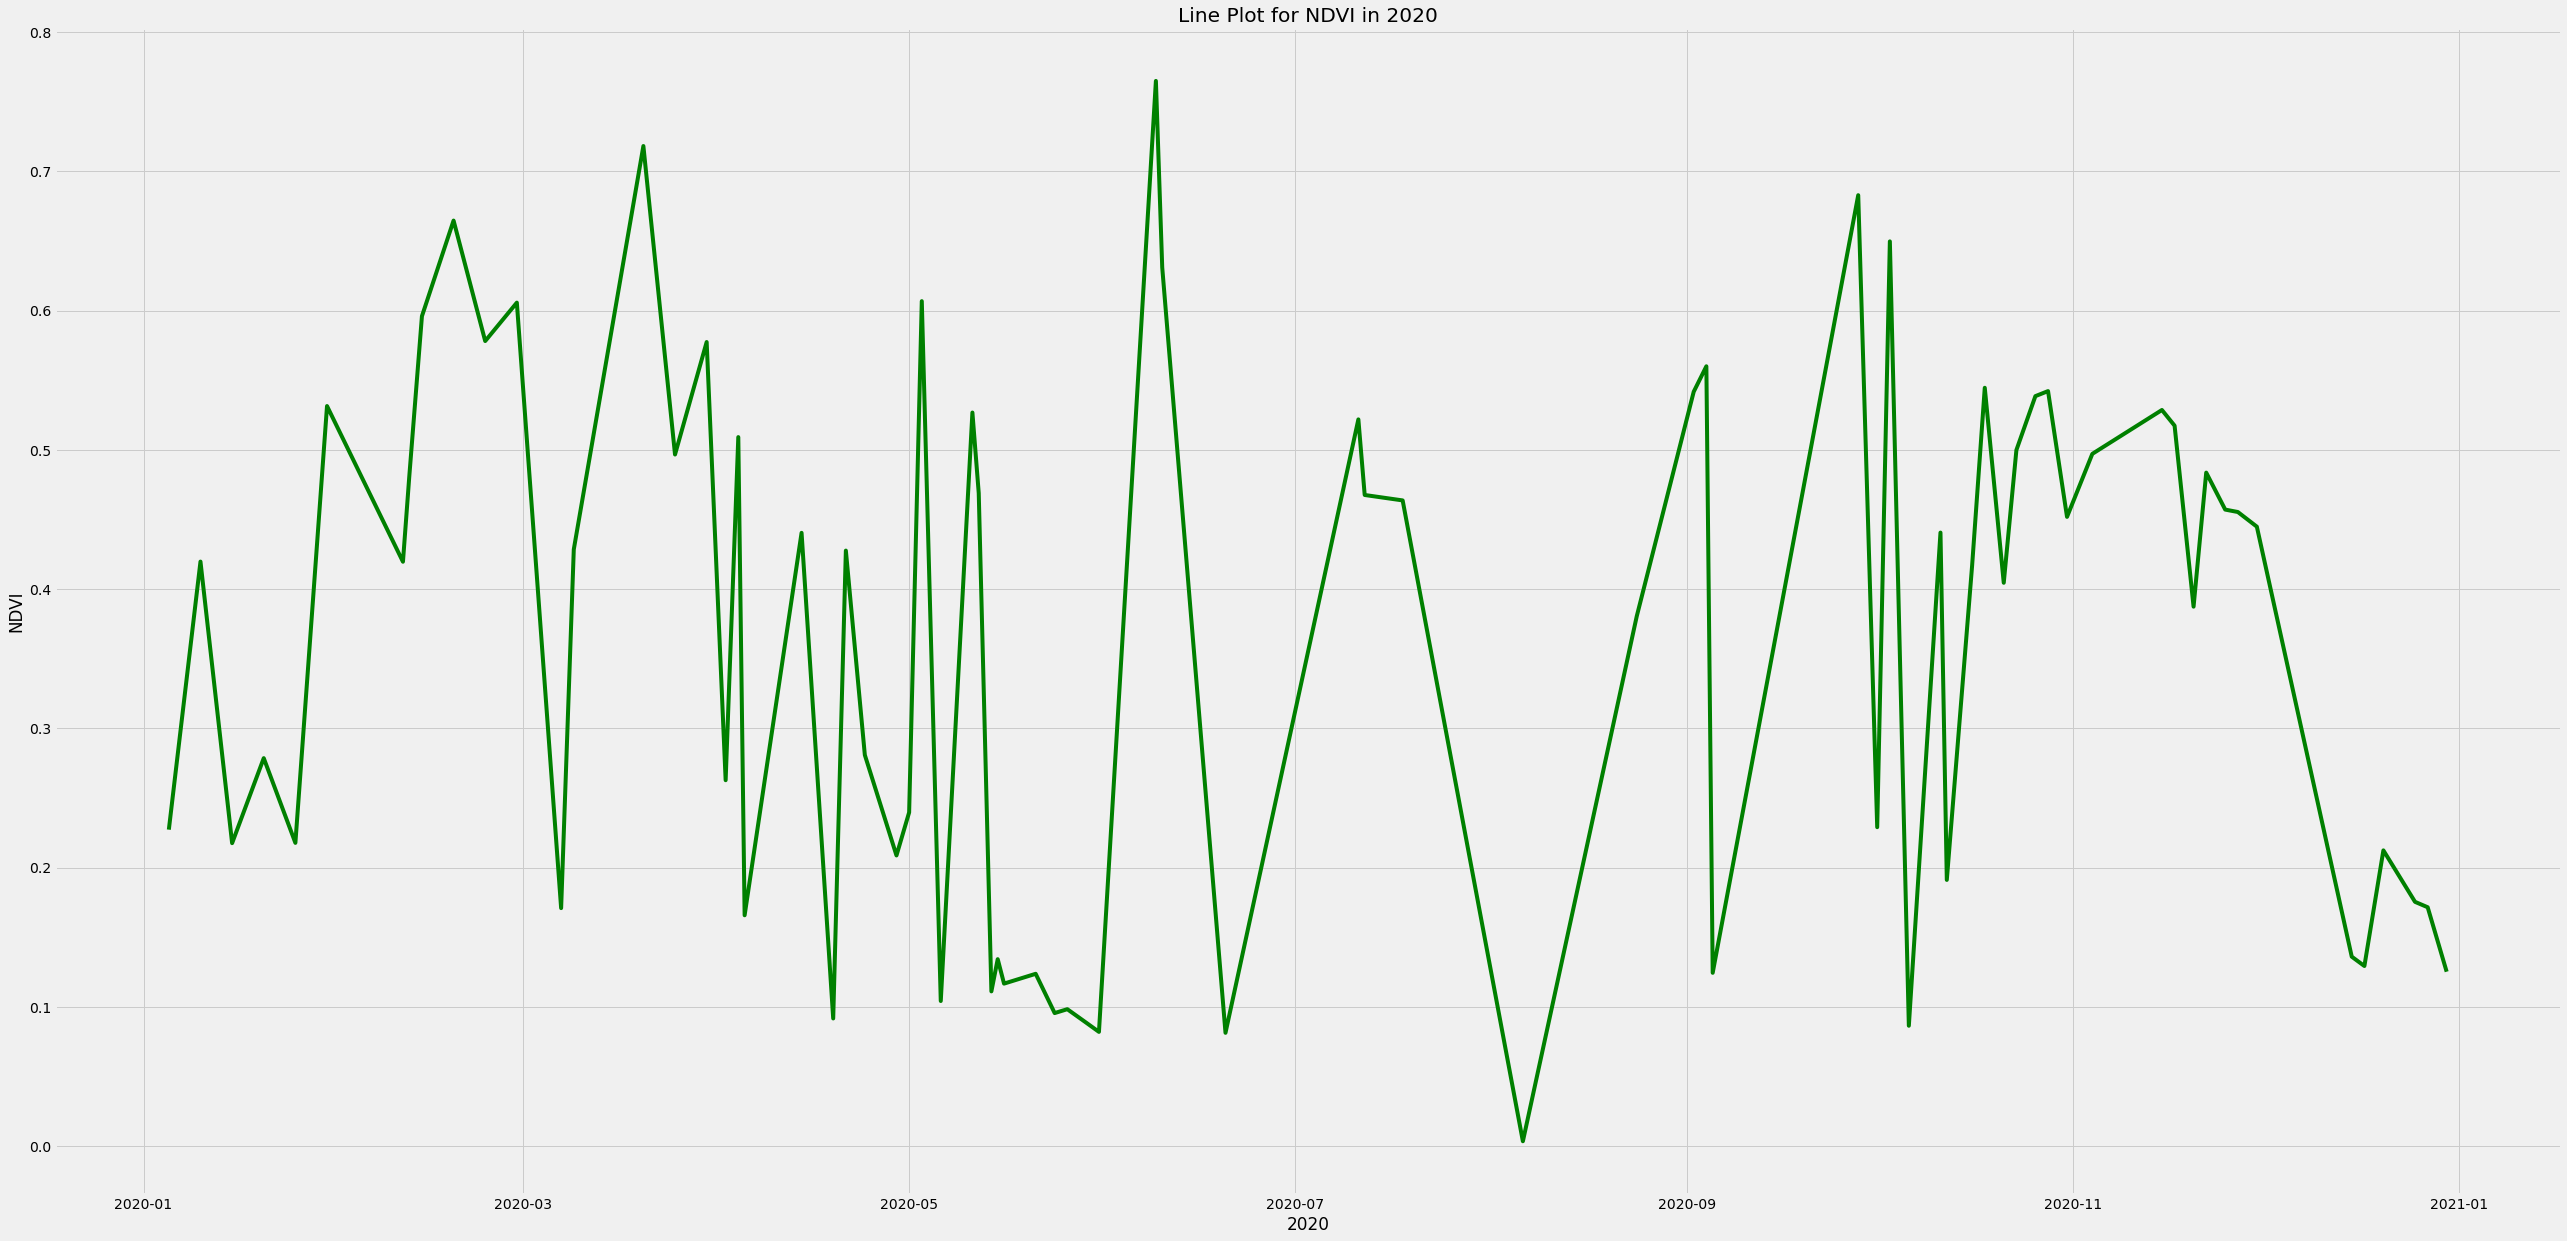

In [ ]:
#Line plot for ndvi 2020
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2020['date'], df_2020['NDVI'], color='green')

ax.set(xlabel="2020", ylabel="NDVI", title="Line Plot for NDVI in 2020")

plt.show()

In [ ]:
#viewing dataframe for 2021
df_2021

GREEN          RED          NIR  QA60       date      NDVI  \
265  1489.045855  1328.866392  1735.561718   0.0 2021-01-01  0.132715   
266   892.017761   759.986357  1502.228950   0.0 2021-01-14  0.328104   
267  1393.536772  1208.750222  1898.459272   0.0 2021-01-16  0.221971   
268  1221.321466  1069.971664  1872.081456   0.0 2021-01-19  0.272636   
269  1094.140066   901.428029  2037.573101   0.0 2021-01-21  0.386575   
..           ...          ...          ...   ...        ...       ...   
321  1089.780657   992.404698  2759.185356   0.0 2021-10-03  0.470942   
322  2566.368935  2676.572455  2987.263664   0.0 2021-10-07  0.054855   
323   996.135061   854.833858  1545.461694   0.0 2021-11-01  0.287726   
324  1724.150965  2061.511585  2619.400339   0.0 2021-11-05  0.119184   
325  1182.870590  1041.101074  3088.039961   0.0 2021-12-03  0.495730   

        GNDVI      SAVI  
265  0.076448  0.247746  
266  0.254866  0.548393  
267  0.153379  0.394571  
268  0.210370  0.470825  
269  0.301251  0.623580  
..        ...       ...  
321  0.433728  0.719996  
322  0.075787  0.106684  
323  0.216134  0.492520  
324  0.206110  0.224121  
325  0.446080  0.745621  

[61 rows x 8 columns]

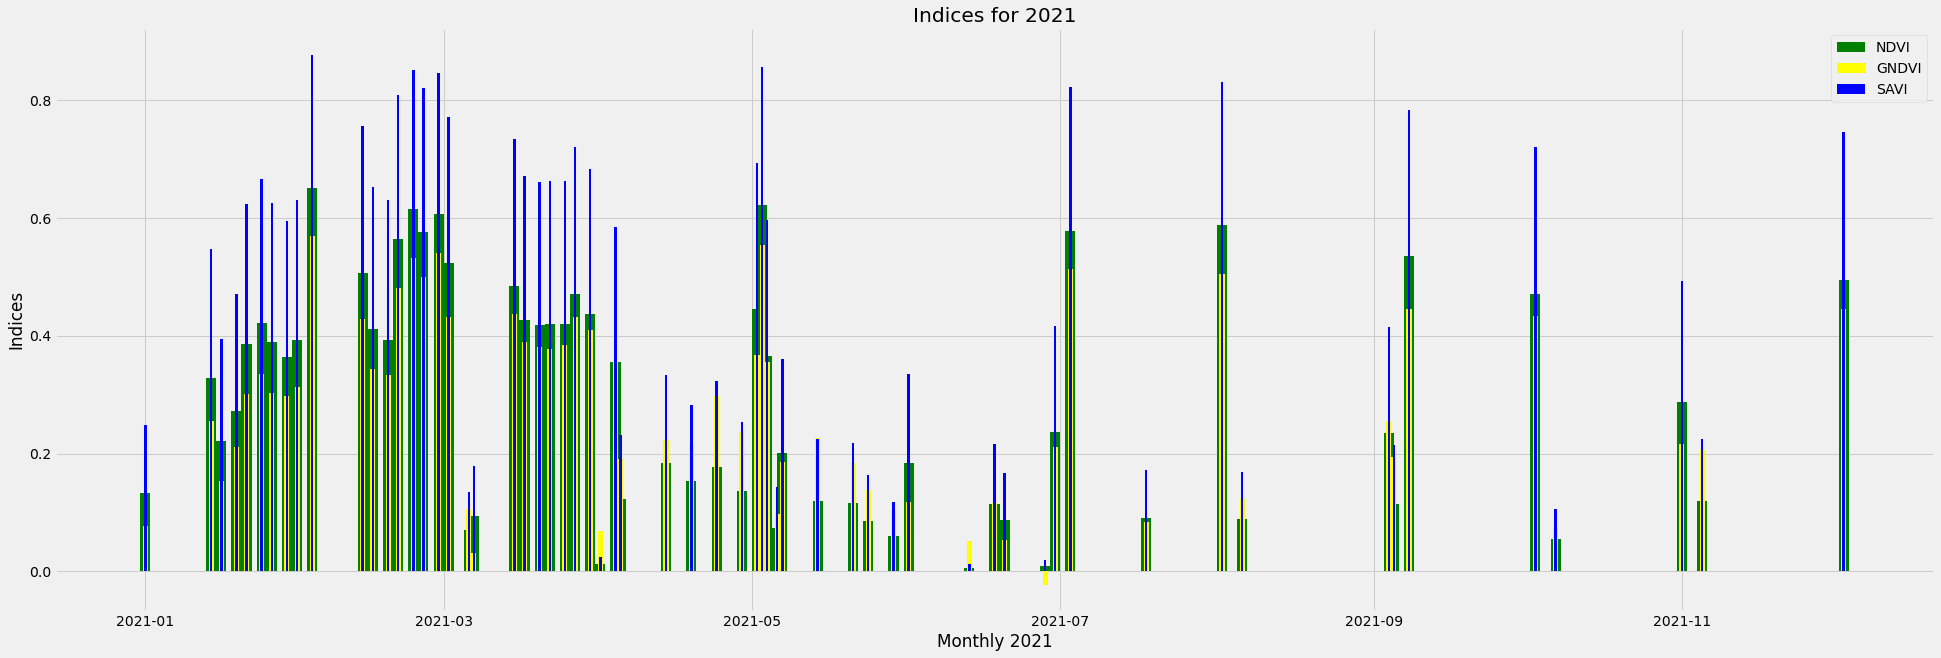

In [ ]:
#bar chart plot for NDVI, GNDVI, SAVI Indices 2021
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
plt.bar(df_2021['date'], df_2021['NDVI'],  color ='green', width = 2, label = 'NDVI')
plt.bar(df_2021['date'], df_2021['GNDVI'],  color ='yellow', width = 1, label = 'GNDVI')
plt.bar(df_2021['date'], df_2021['SAVI'],  color ='blue', width = 0.5, label = 'SAVI')

plt.xlabel("Monthly 2021")
plt.ylabel("Indices")
plt.legend()
plt.title("Indices for 2021")
plt.show()

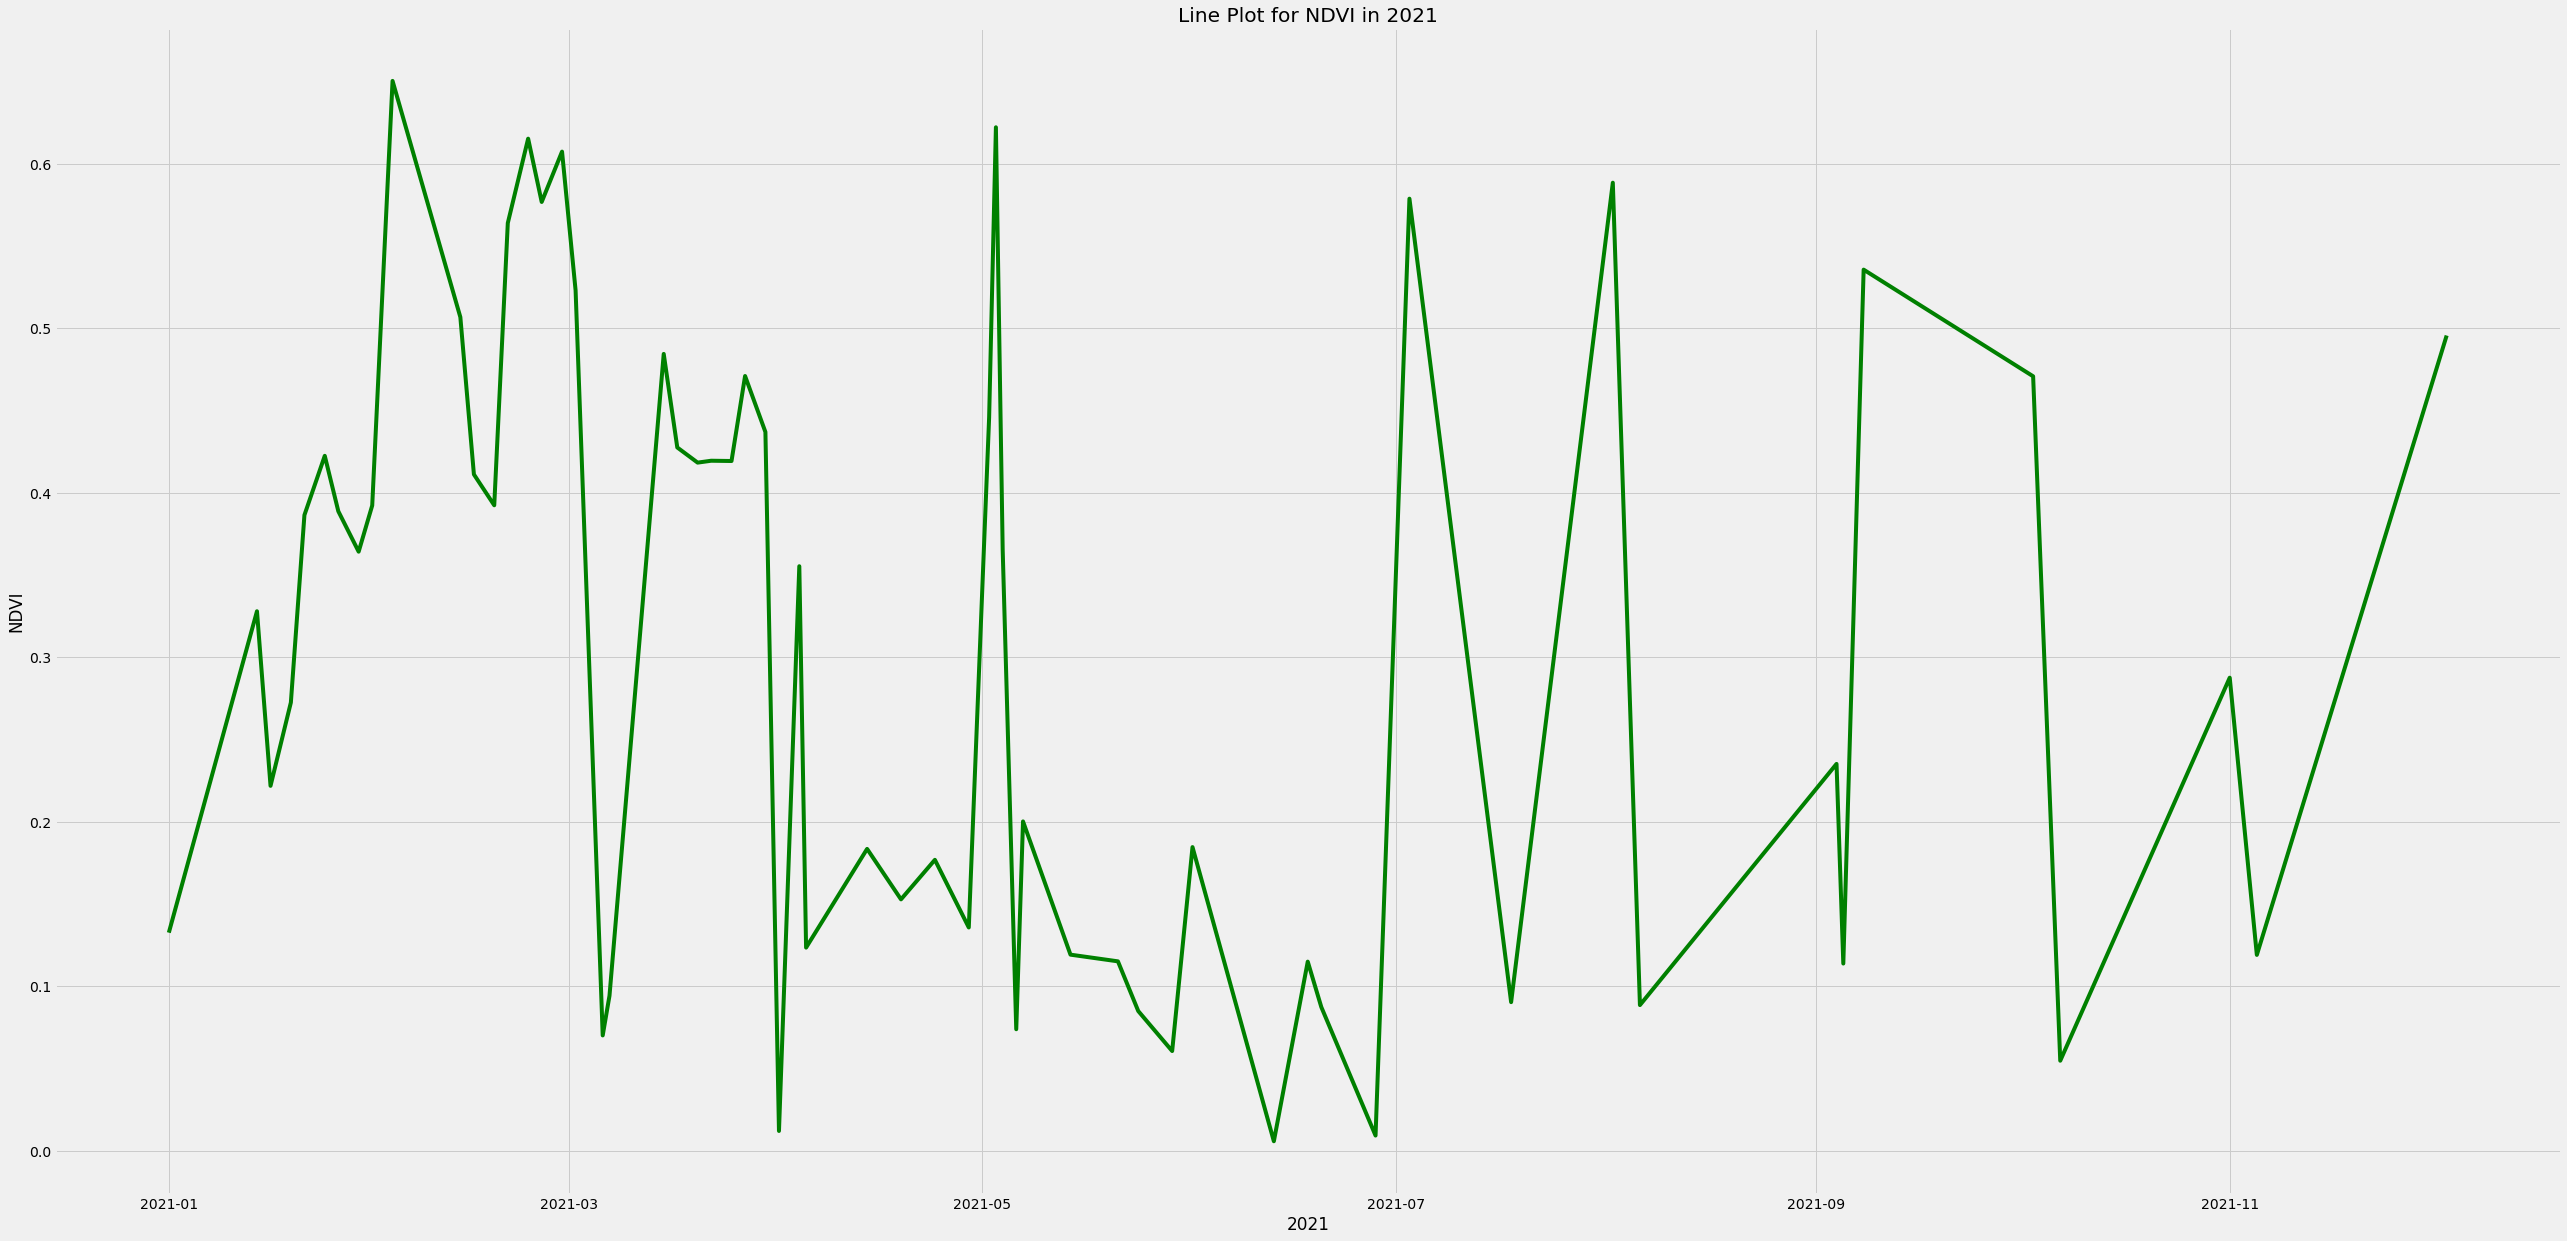

In [ ]:
#Line plot for ndvi 2021
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2021['date'], df_2021['NDVI'], color='green')

ax.set(xlabel="2021", ylabel="NDVI", title="Line Plot for NDVI in 2021")

plt.show()

*********************LINE PLOTS FOR THE 3-INDICES*********************

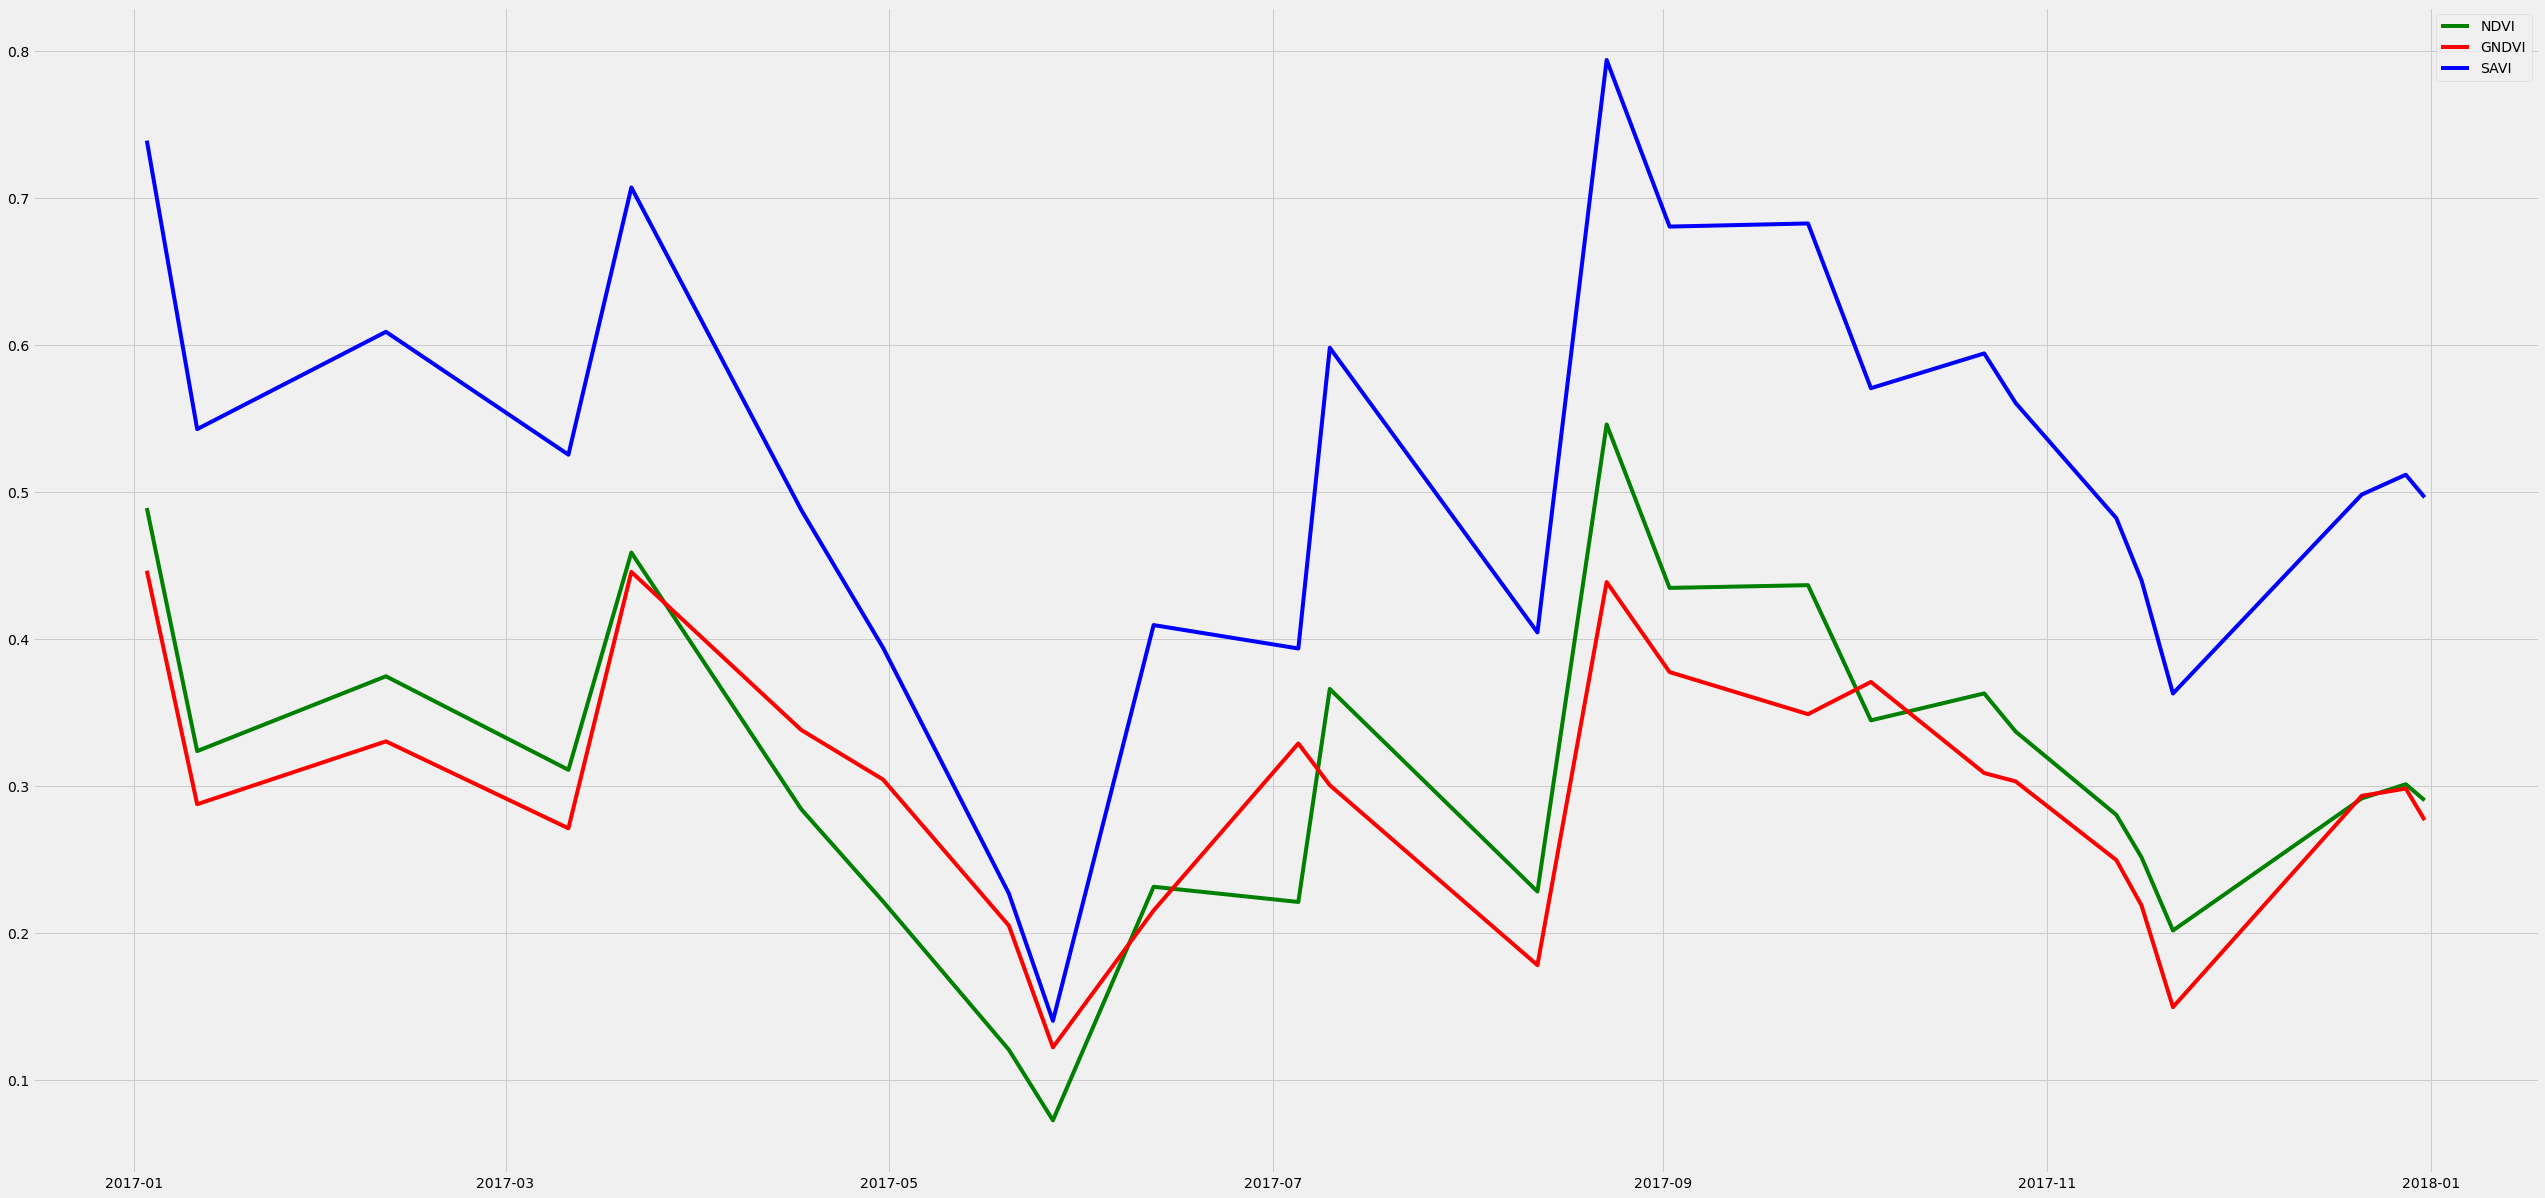

In [ ]:
#grouped Line Plots for NDVI, GNDVI, SAVI indices 2017
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2017['date'], df_2017['NDVI'],color='Green')
ax.plot(df_2017['date'], df_2017['GNDVI'],color='Red')
ax.plot(df_2017['date'], df_2017['SAVI'],color='Blue')
ax.legend(['NDVI', 'GNDVI','SAVI'], bbox_to_anchor=(1,1))

plt.show()


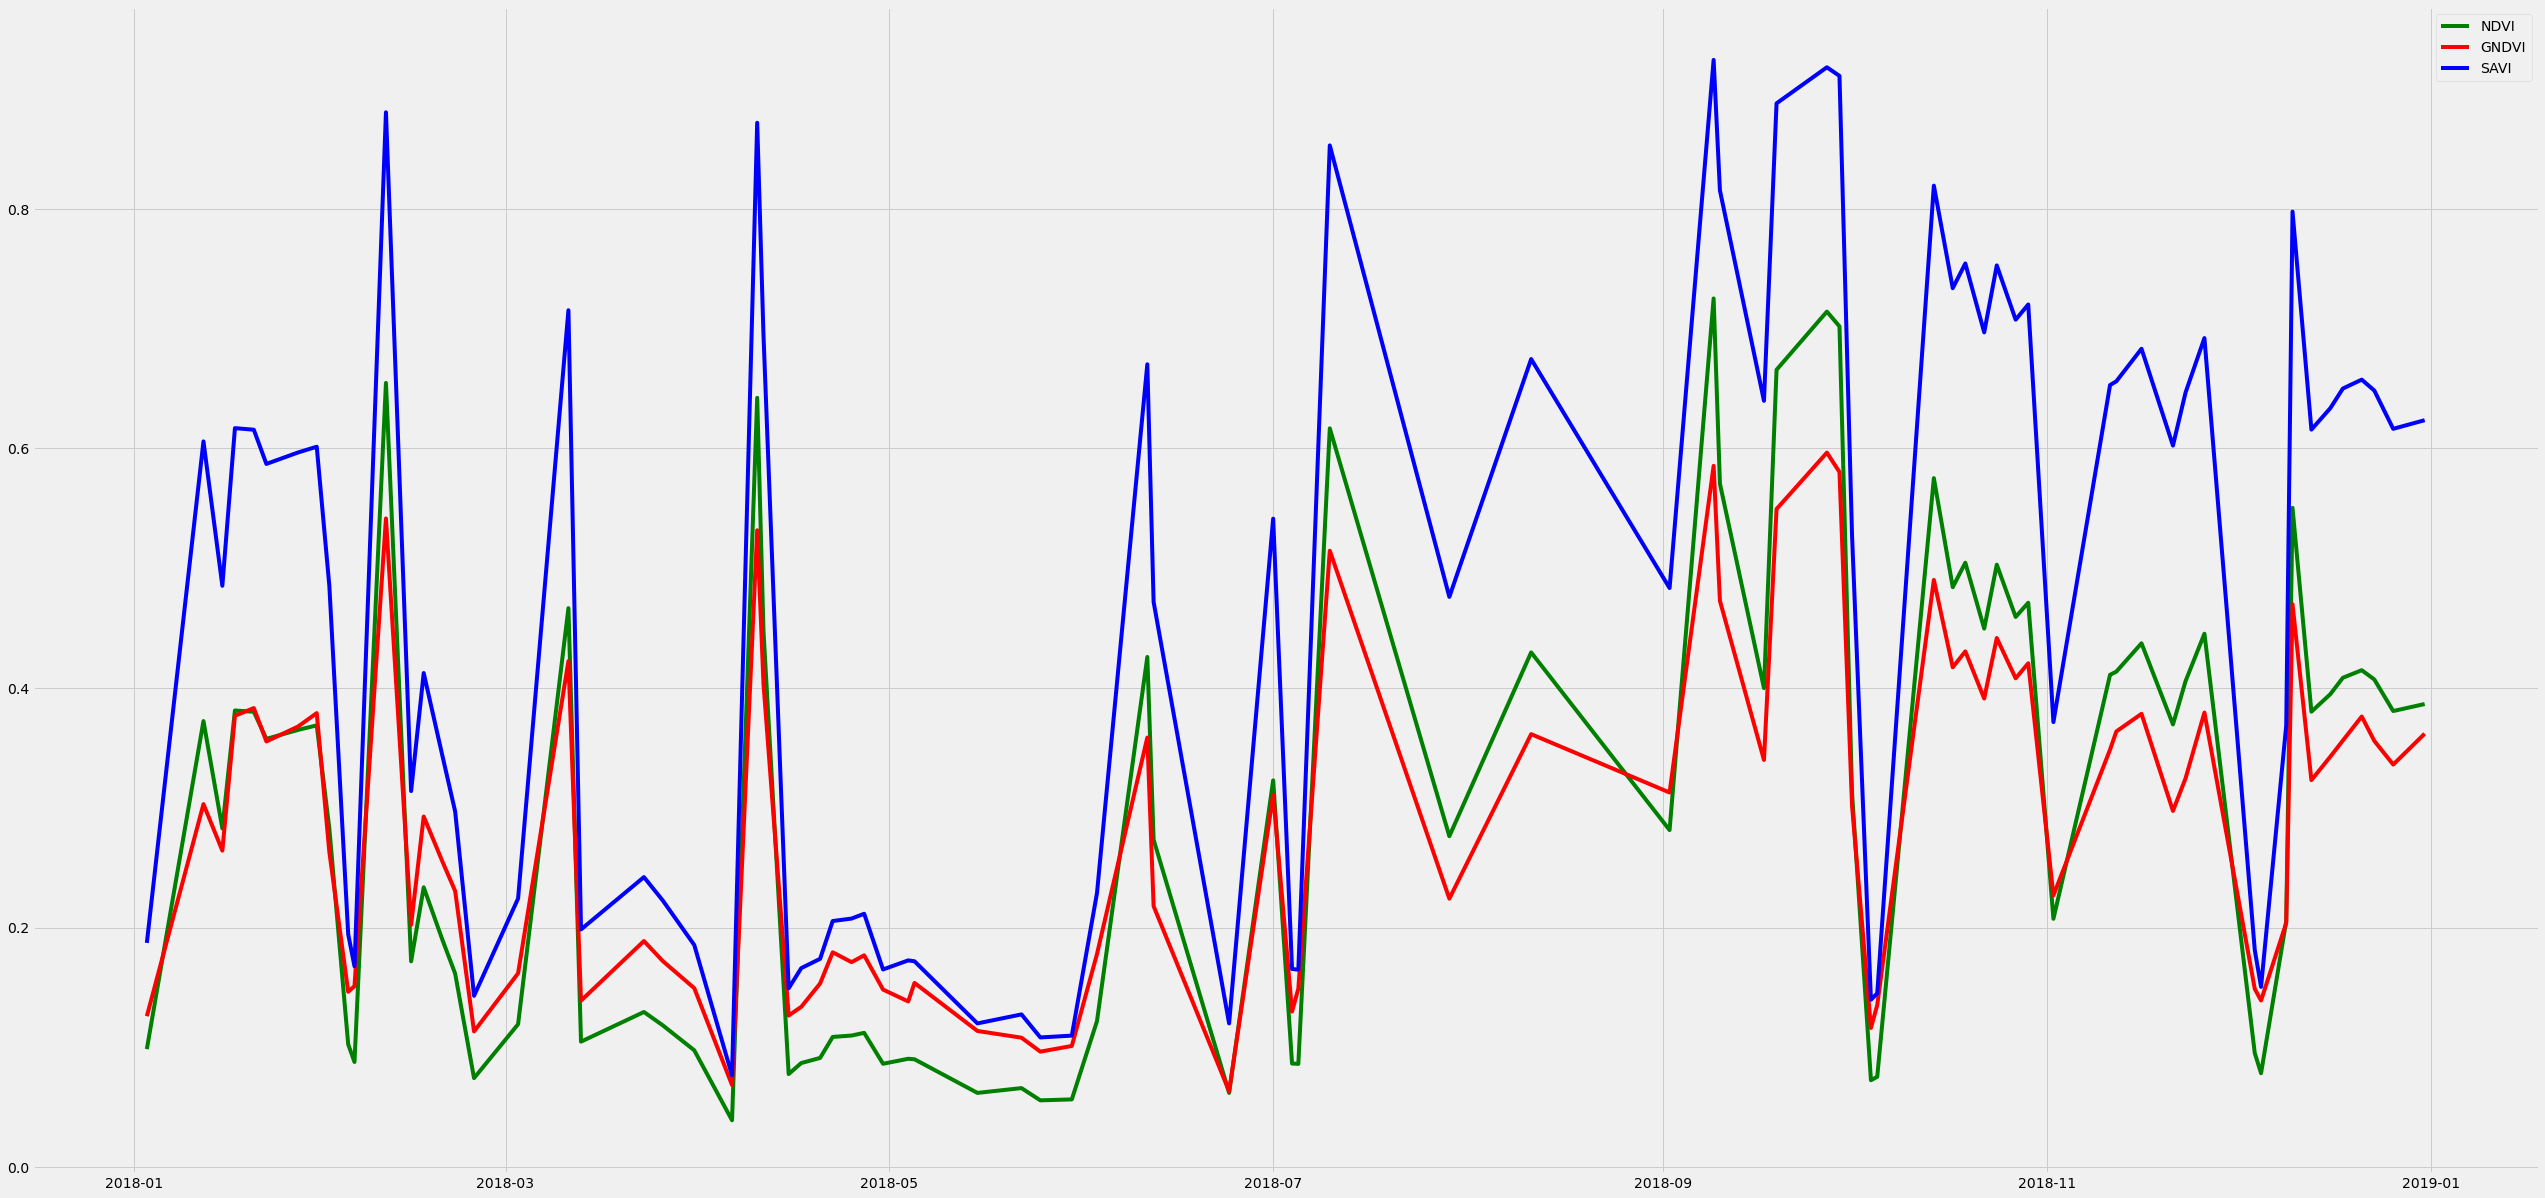

In [ ]:
#grouped Line Plots for NDVI, GNDVI, SAVI indices 2018
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2018['date'], df_2018['NDVI'],color='Green')
ax.plot(df_2018['date'], df_2018['GNDVI'],color='Red')
ax.plot(df_2018['date'], df_2018['SAVI'],color='Blue')
ax.legend(['NDVI', 'GNDVI','SAVI'], bbox_to_anchor=(1,1))

plt.show()

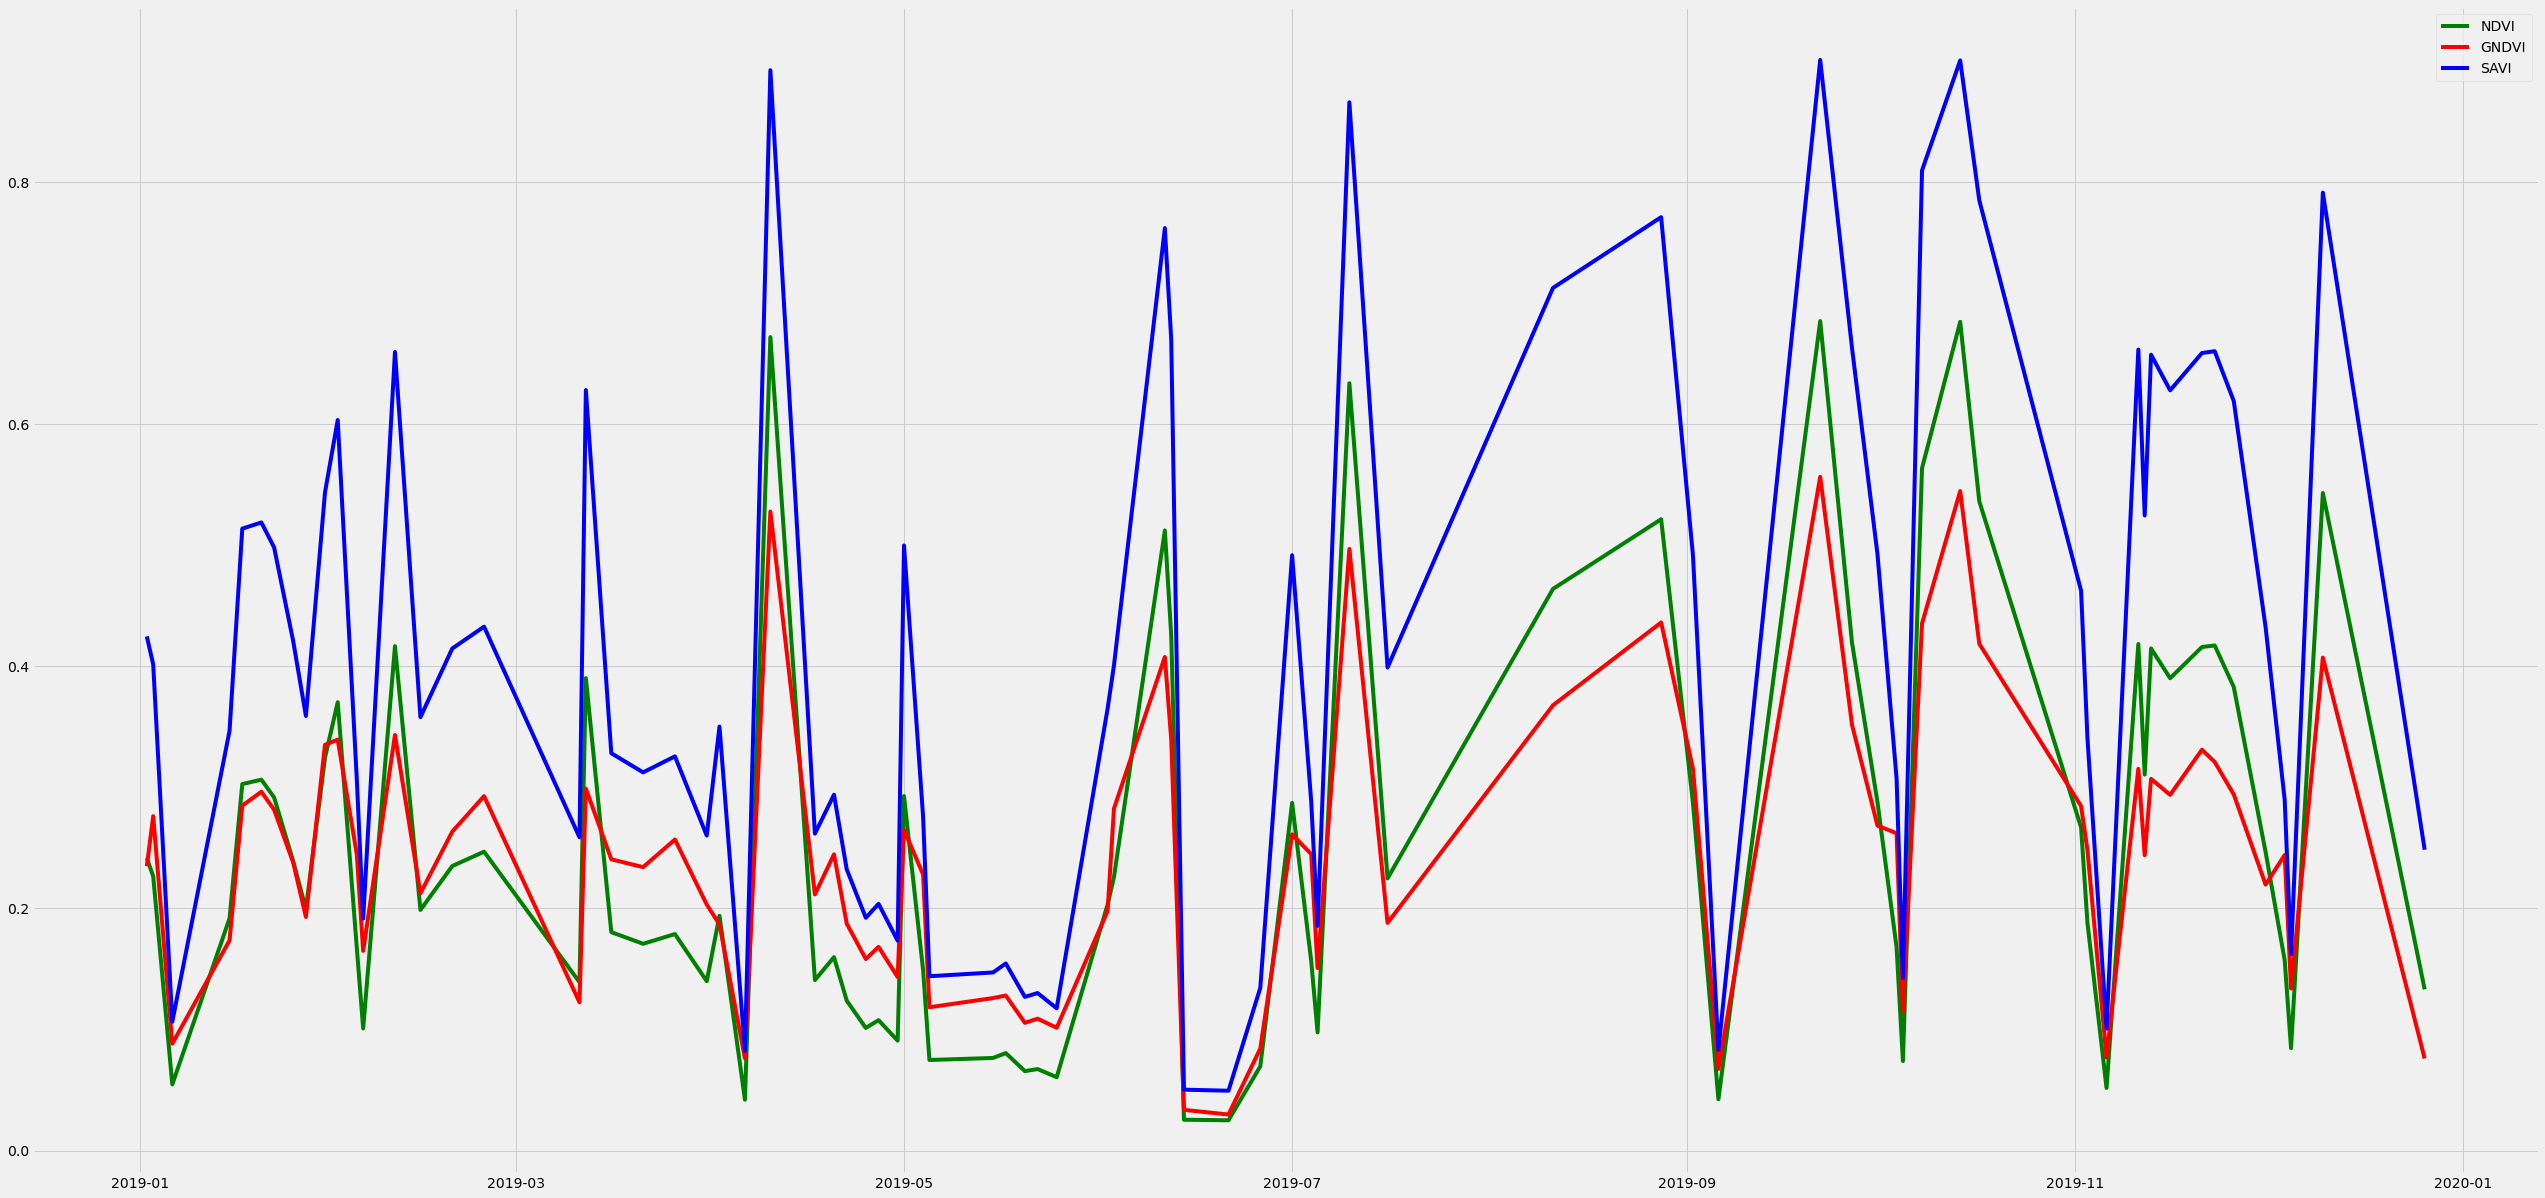

In [ ]:
#grouped Line Plots for NDVI, GNDVI, SAVI indices 2019
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2019['date'], df_2019['NDVI'],color='Green')
ax.plot(df_2019['date'], df_2019['GNDVI'],color='Red')
ax.plot(df_2019['date'], df_2019['SAVI'],color='Blue')
ax.legend(['NDVI', 'GNDVI','SAVI'], bbox_to_anchor=(1,1))

plt.show()

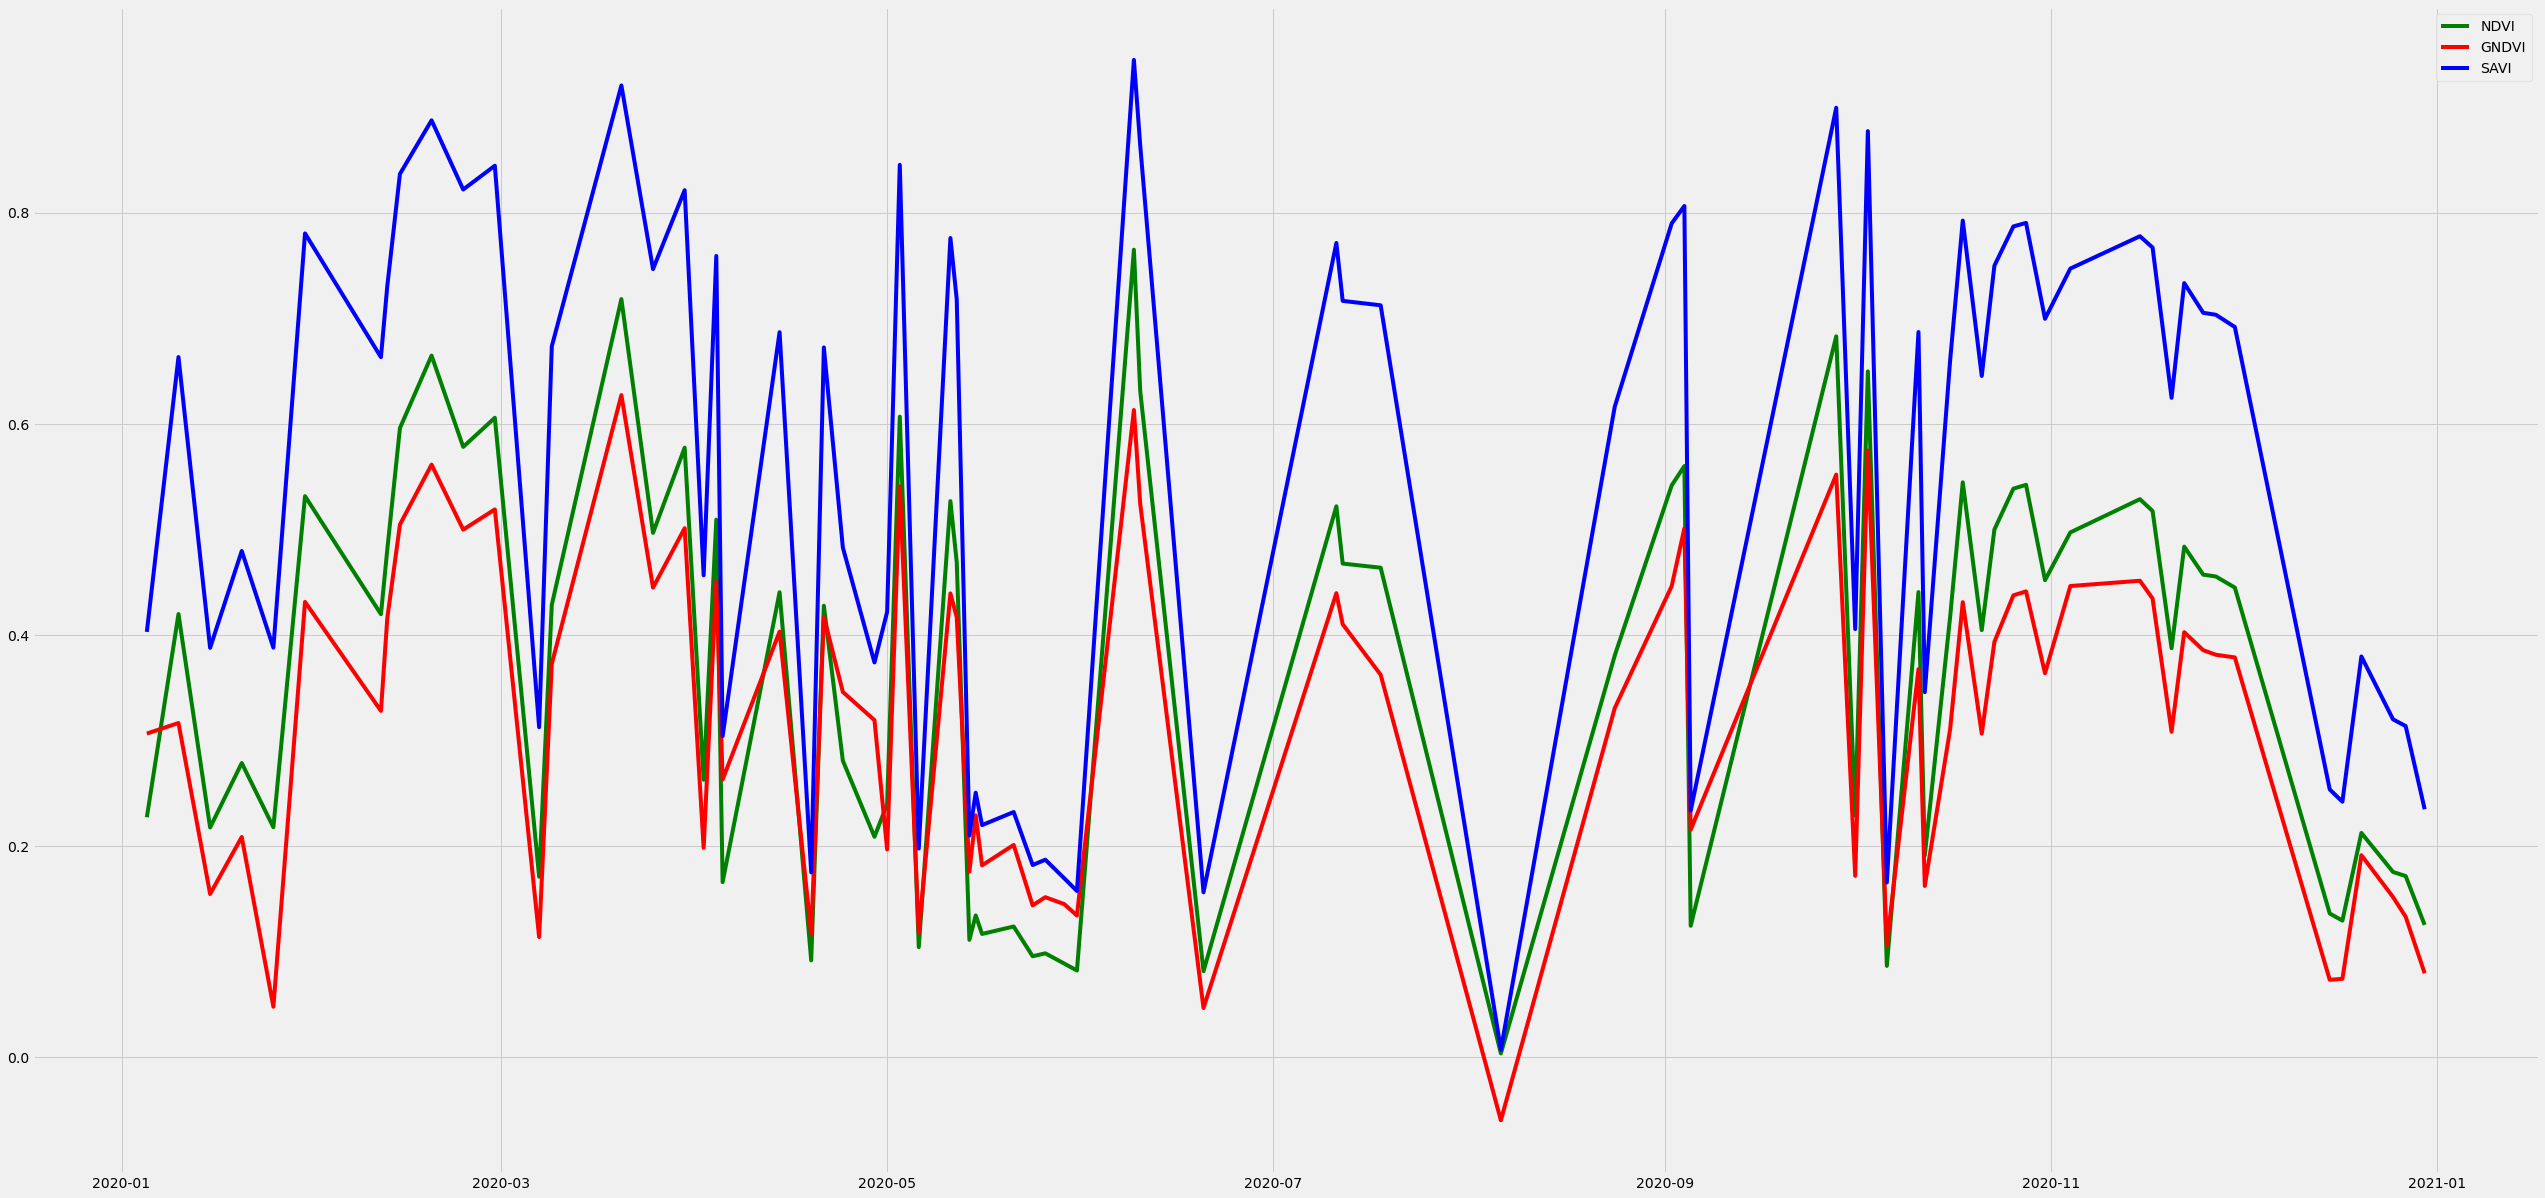

In [ ]:
#grouped Line Plots for NDVI, GNDVI, SAVI indices 2020
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2020['date'], df_2020['NDVI'],color='Green')
ax.plot(df_2020['date'], df_2020['GNDVI'],color='Red')
ax.plot(df_2020['date'], df_2020['SAVI'],color='Blue')
ax.legend(['NDVI', 'GNDVI','SAVI'], bbox_to_anchor=(1,1))

plt.show()

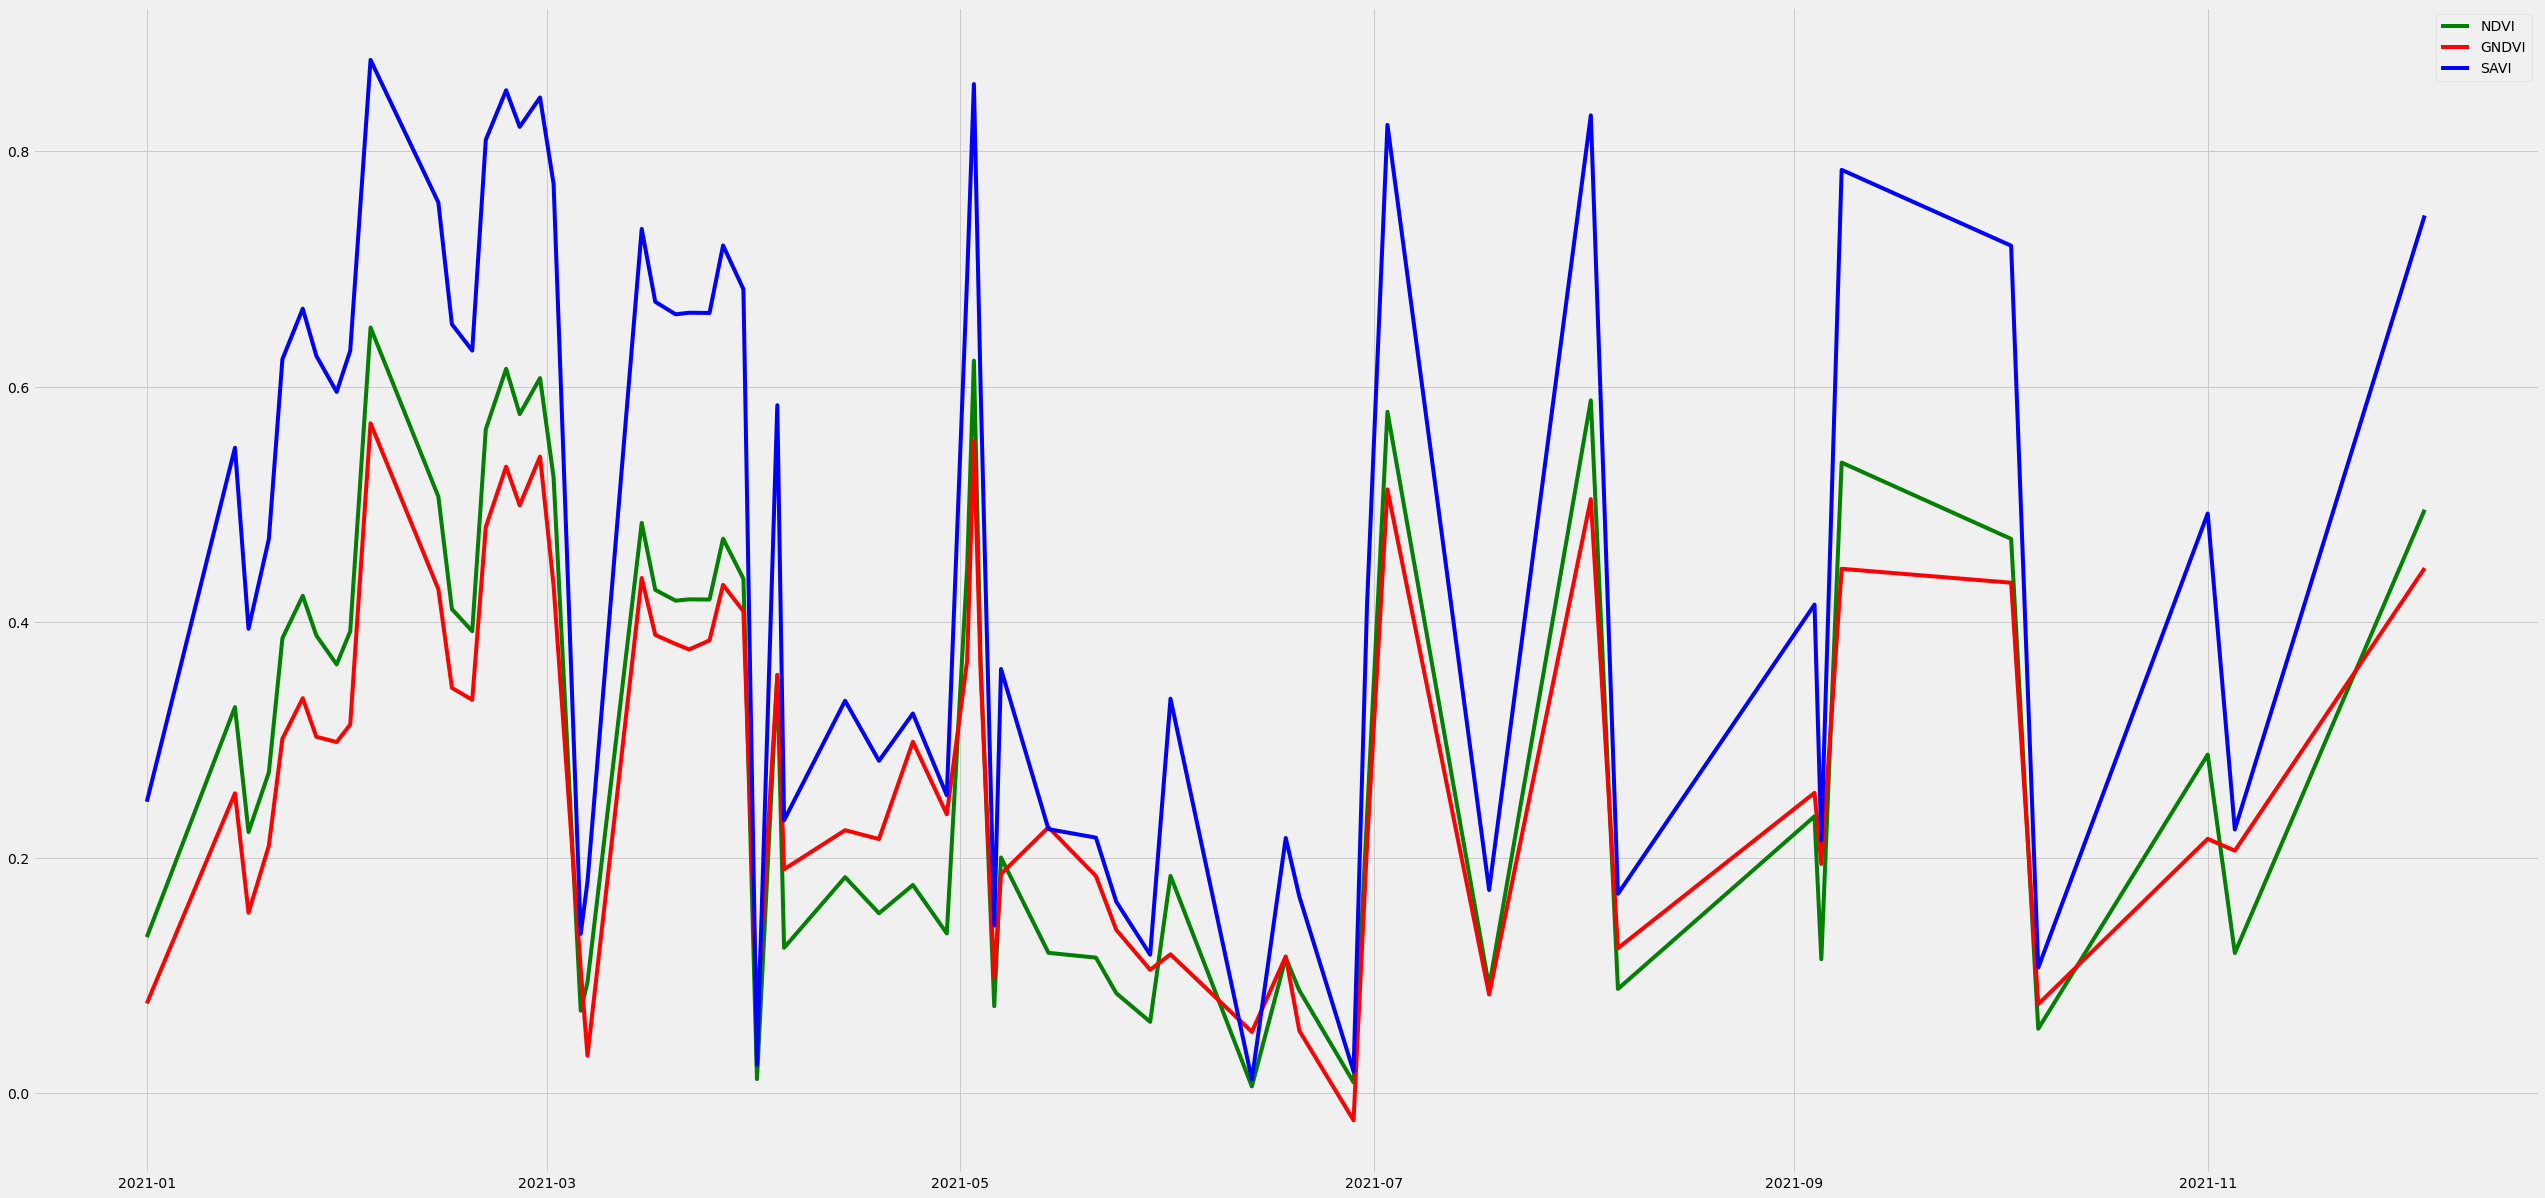

In [ ]:
#grouped Line Plots for NDVI, GNDVI, SAVI indices 2021
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(df_2021['date'], df_2021['NDVI'],color='Green')
ax.plot(df_2021['date'], df_2021['GNDVI'],color='Red')
ax.plot(df_2021['date'], df_2021['SAVI'],color='Blue')
ax.legend(['NDVI', 'GNDVI','SAVI'], bbox_to_anchor=(1,1))

plt.show()

***********************SMOOTH PROFILE FOR THE INDICES*********************

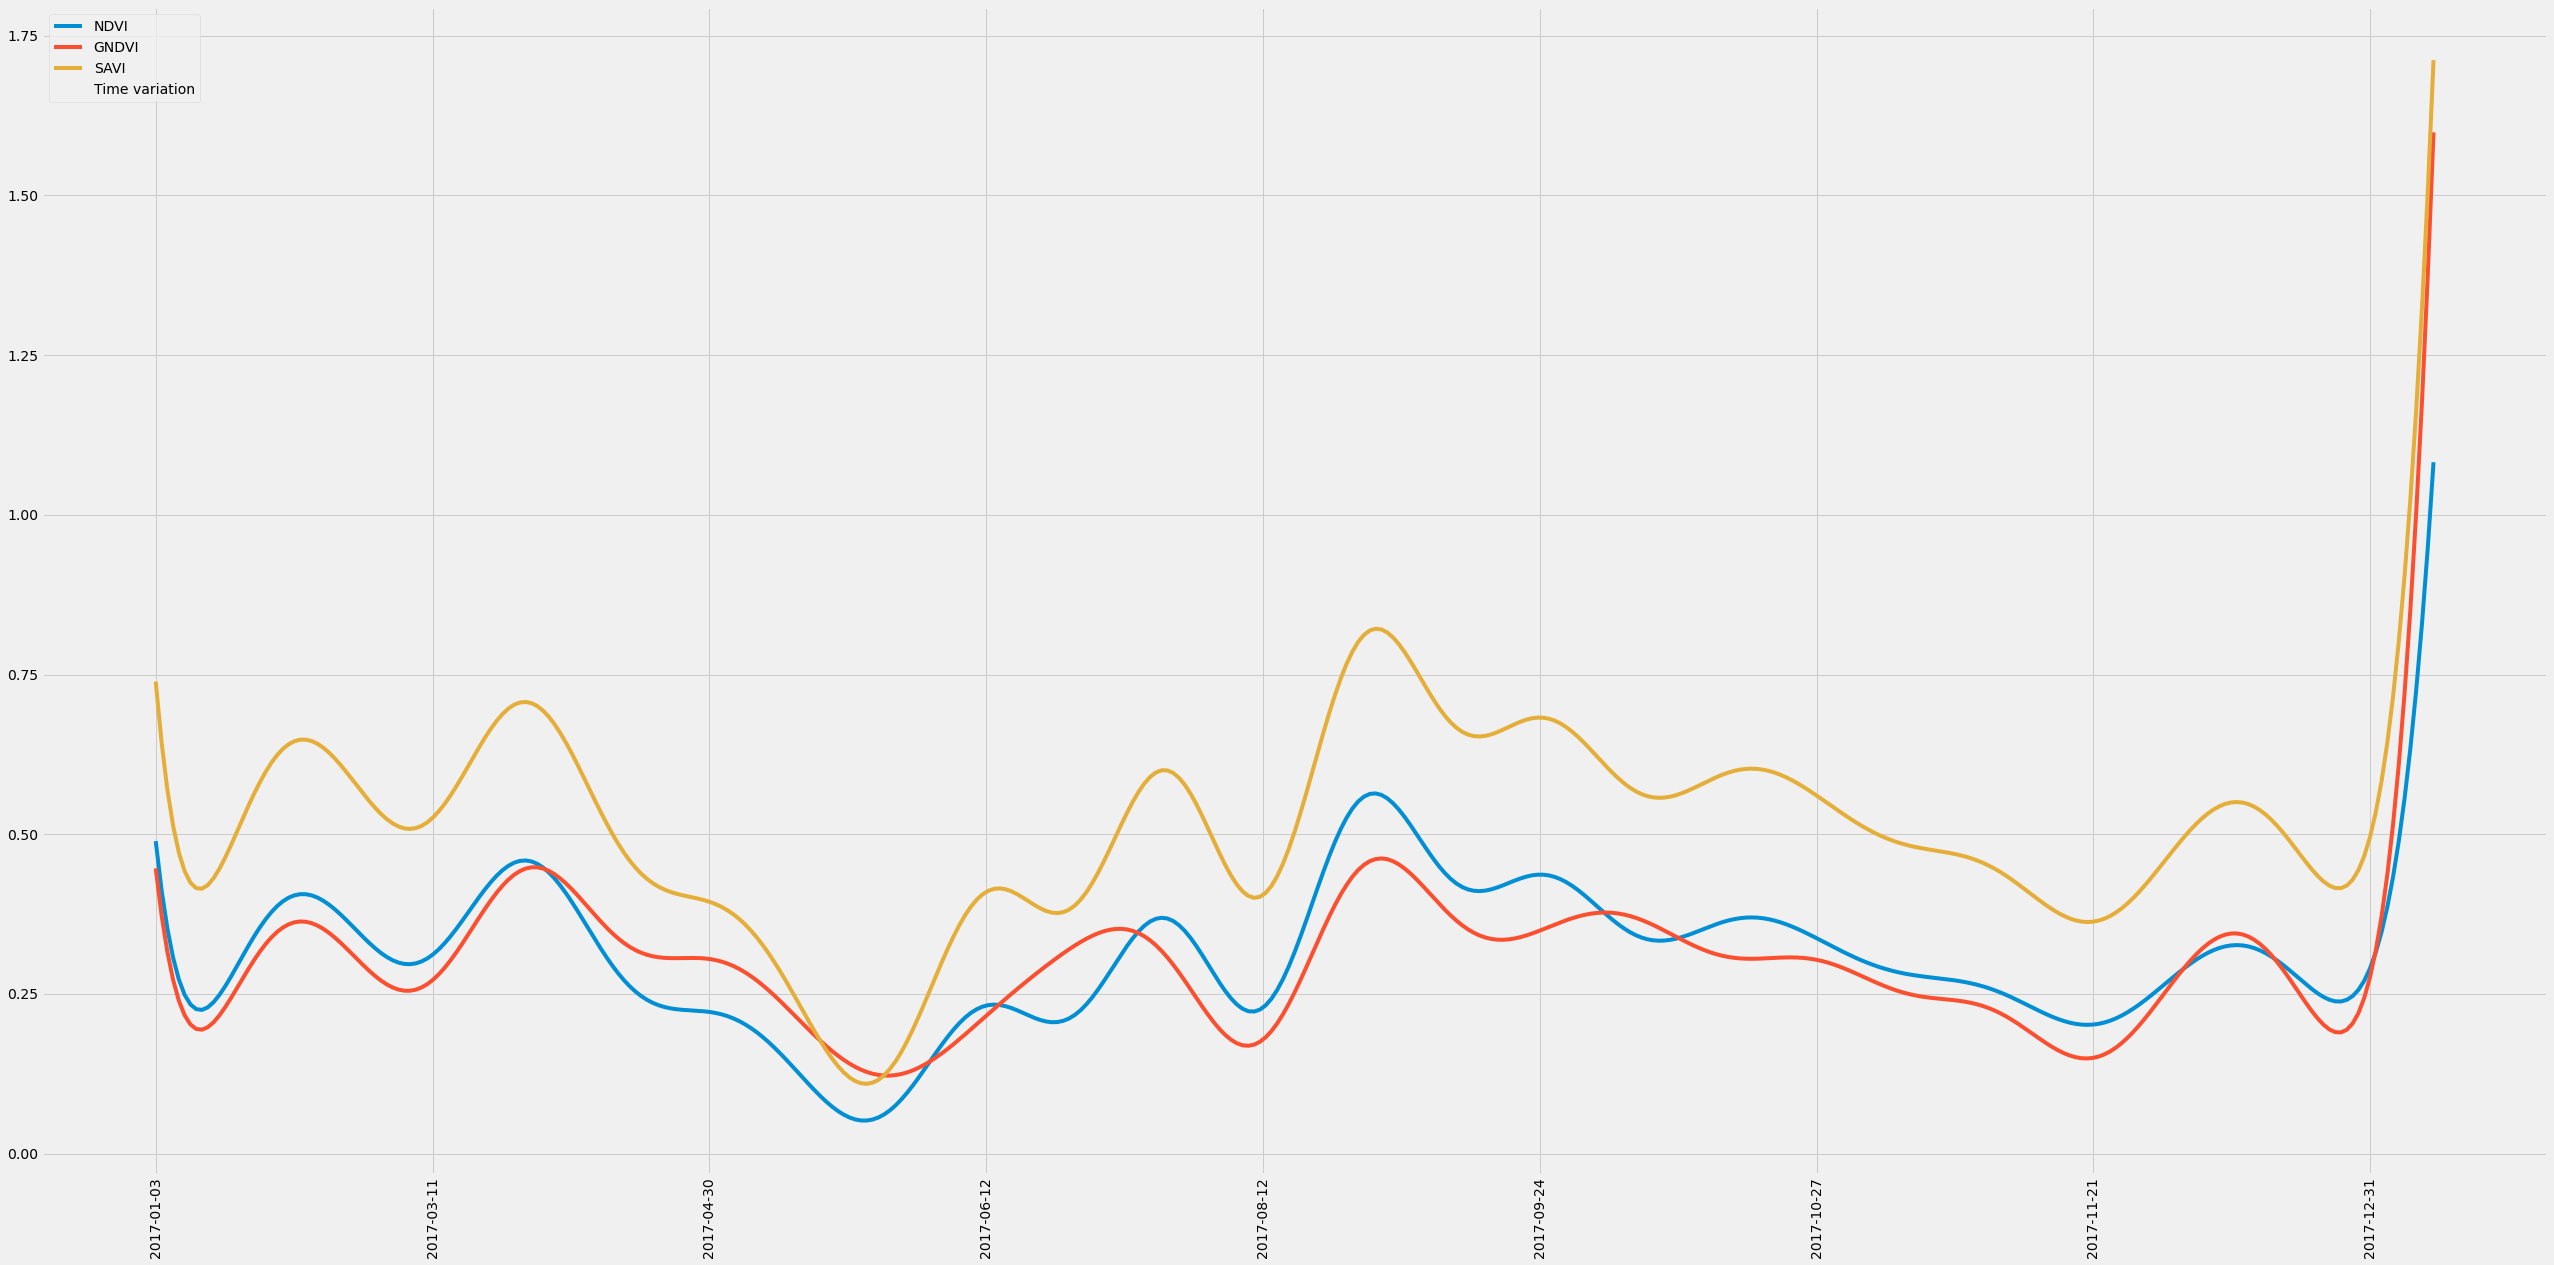

In [ ]:
#Smooth profile for the NDVI, GNDVI, SAVI indices 2017


fig, axs = plt.subplots(1, 1, figsize=(40, 20))

x = df_2017.date
y = df_2017.NDVI
v = df_2017.GNDVI
w = df_2017.SAVI

x_new = np.linspace(0, len(df_2017.date), 400)

a_BSpline = make_interp_spline([i for i in range(0, len(df_2017.date))], df_2017.NDVI, k=5,)
b_BSpline = make_interp_spline([i for i in range(0, len(df_2017.date))], df_2017.GNDVI, k=5,)
c_BSpline = make_interp_spline([i for i in range(0, len(df_2017.date))], df_2017.SAVI, k=5,)

y_new = a_BSpline(x_new)
v_new = b_BSpline(x_new)
w_new = c_BSpline(x_new)

axs.plot(x_new[:-5], y_new[:-5],"-",label="NDVI")
axs.plot(x_new[:-5], v_new[:-5],"-",label="GNDVI")
axs.plot(x_new[:-5], w_new[:-5],"-",label="SAVI")

x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="Time variation")
xt = [x[i] for i in range(0,len(x),3)]
plt.xticks(xt,rotation="vertical")
plt.legend()



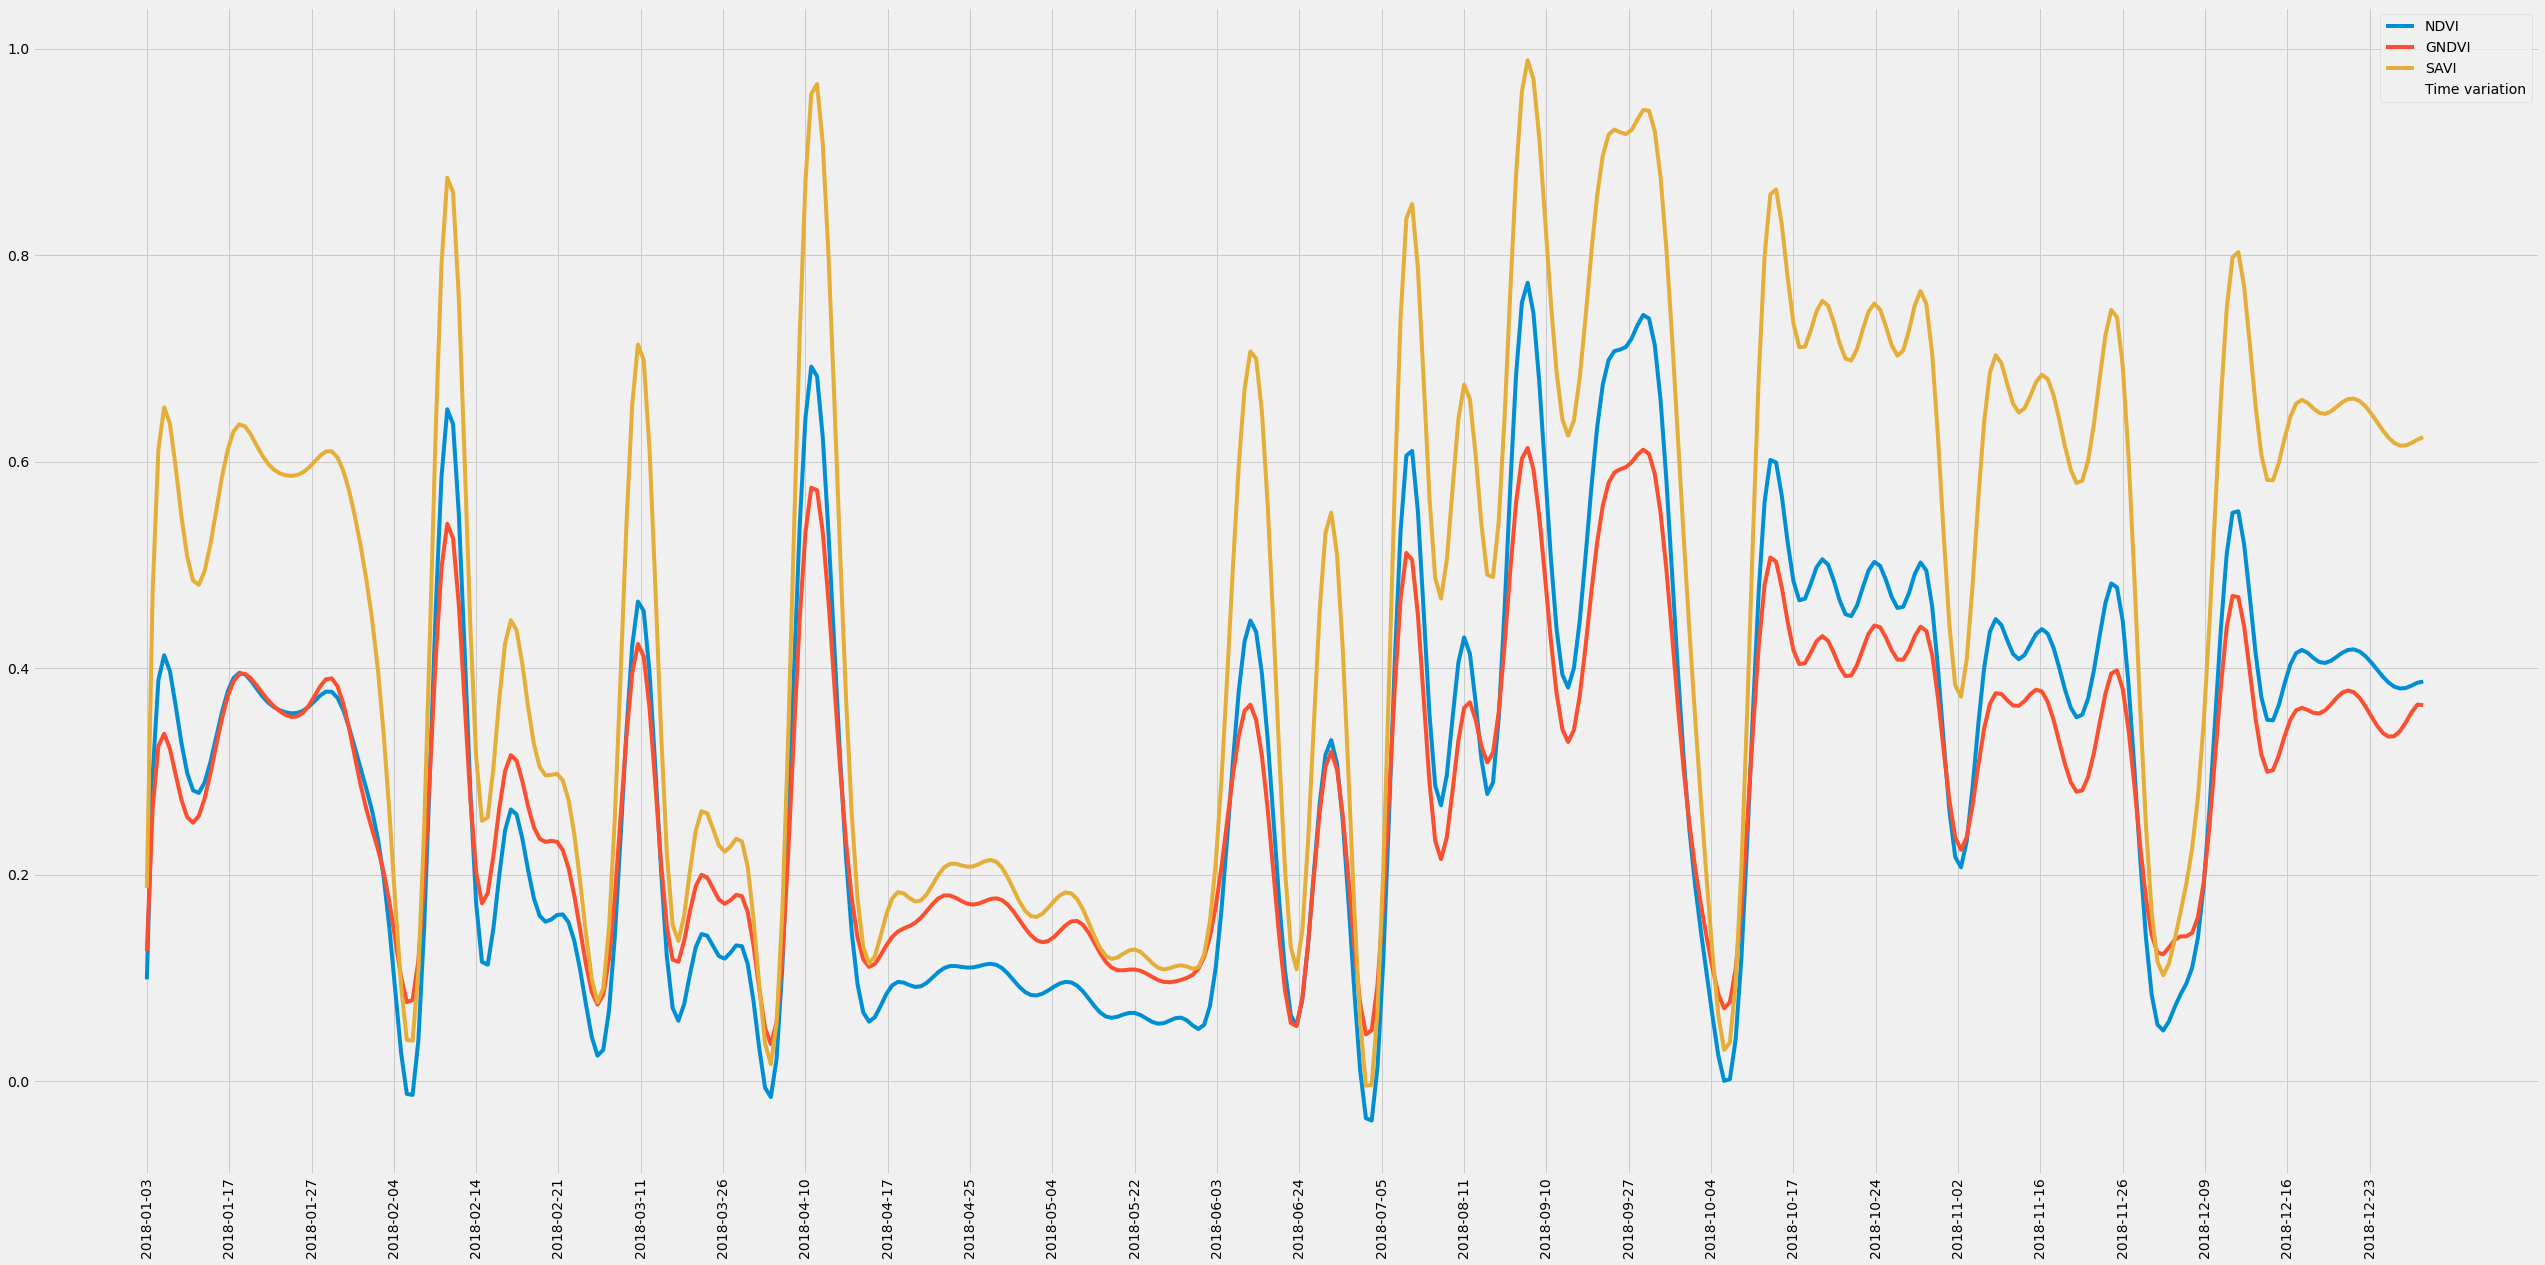

In [ ]:
#Smooth profile for the NDVI, GNDVI, SAVI indices 2018

fig, axs = plt.subplots(1, 1, figsize=(40, 20))

x = df_2018.date
y = df_2018.NDVI
v = df_2018.GNDVI
w = df_2018.SAVI

x_new = np.linspace(0, len(df_2018.date), 400)

a_BSpline = make_interp_spline([i for i in range(0, len(df_2018.date))], df_2018.NDVI, k=5,)
b_BSpline = make_interp_spline([i for i in range(0, len(df_2018.date))], df_2018.GNDVI, k=5,)
c_BSpline = make_interp_spline([i for i in range(0, len(df_2018.date))], df_2018.SAVI, k=5,)

y_new = a_BSpline(x_new)
v_new = b_BSpline(x_new)
w_new = c_BSpline(x_new)

axs.plot(x_new[:-5], y_new[:-5],"-",label="NDVI")
axs.plot(x_new[:-5], v_new[:-5],"-",label="GNDVI")
axs.plot(x_new[:-5], w_new[:-5],"-",label="SAVI")

x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="Time variation")
xt = [x[i] for i in range(0,len(x),3)]
plt.xticks(xt,rotation="vertical")
plt.legend()

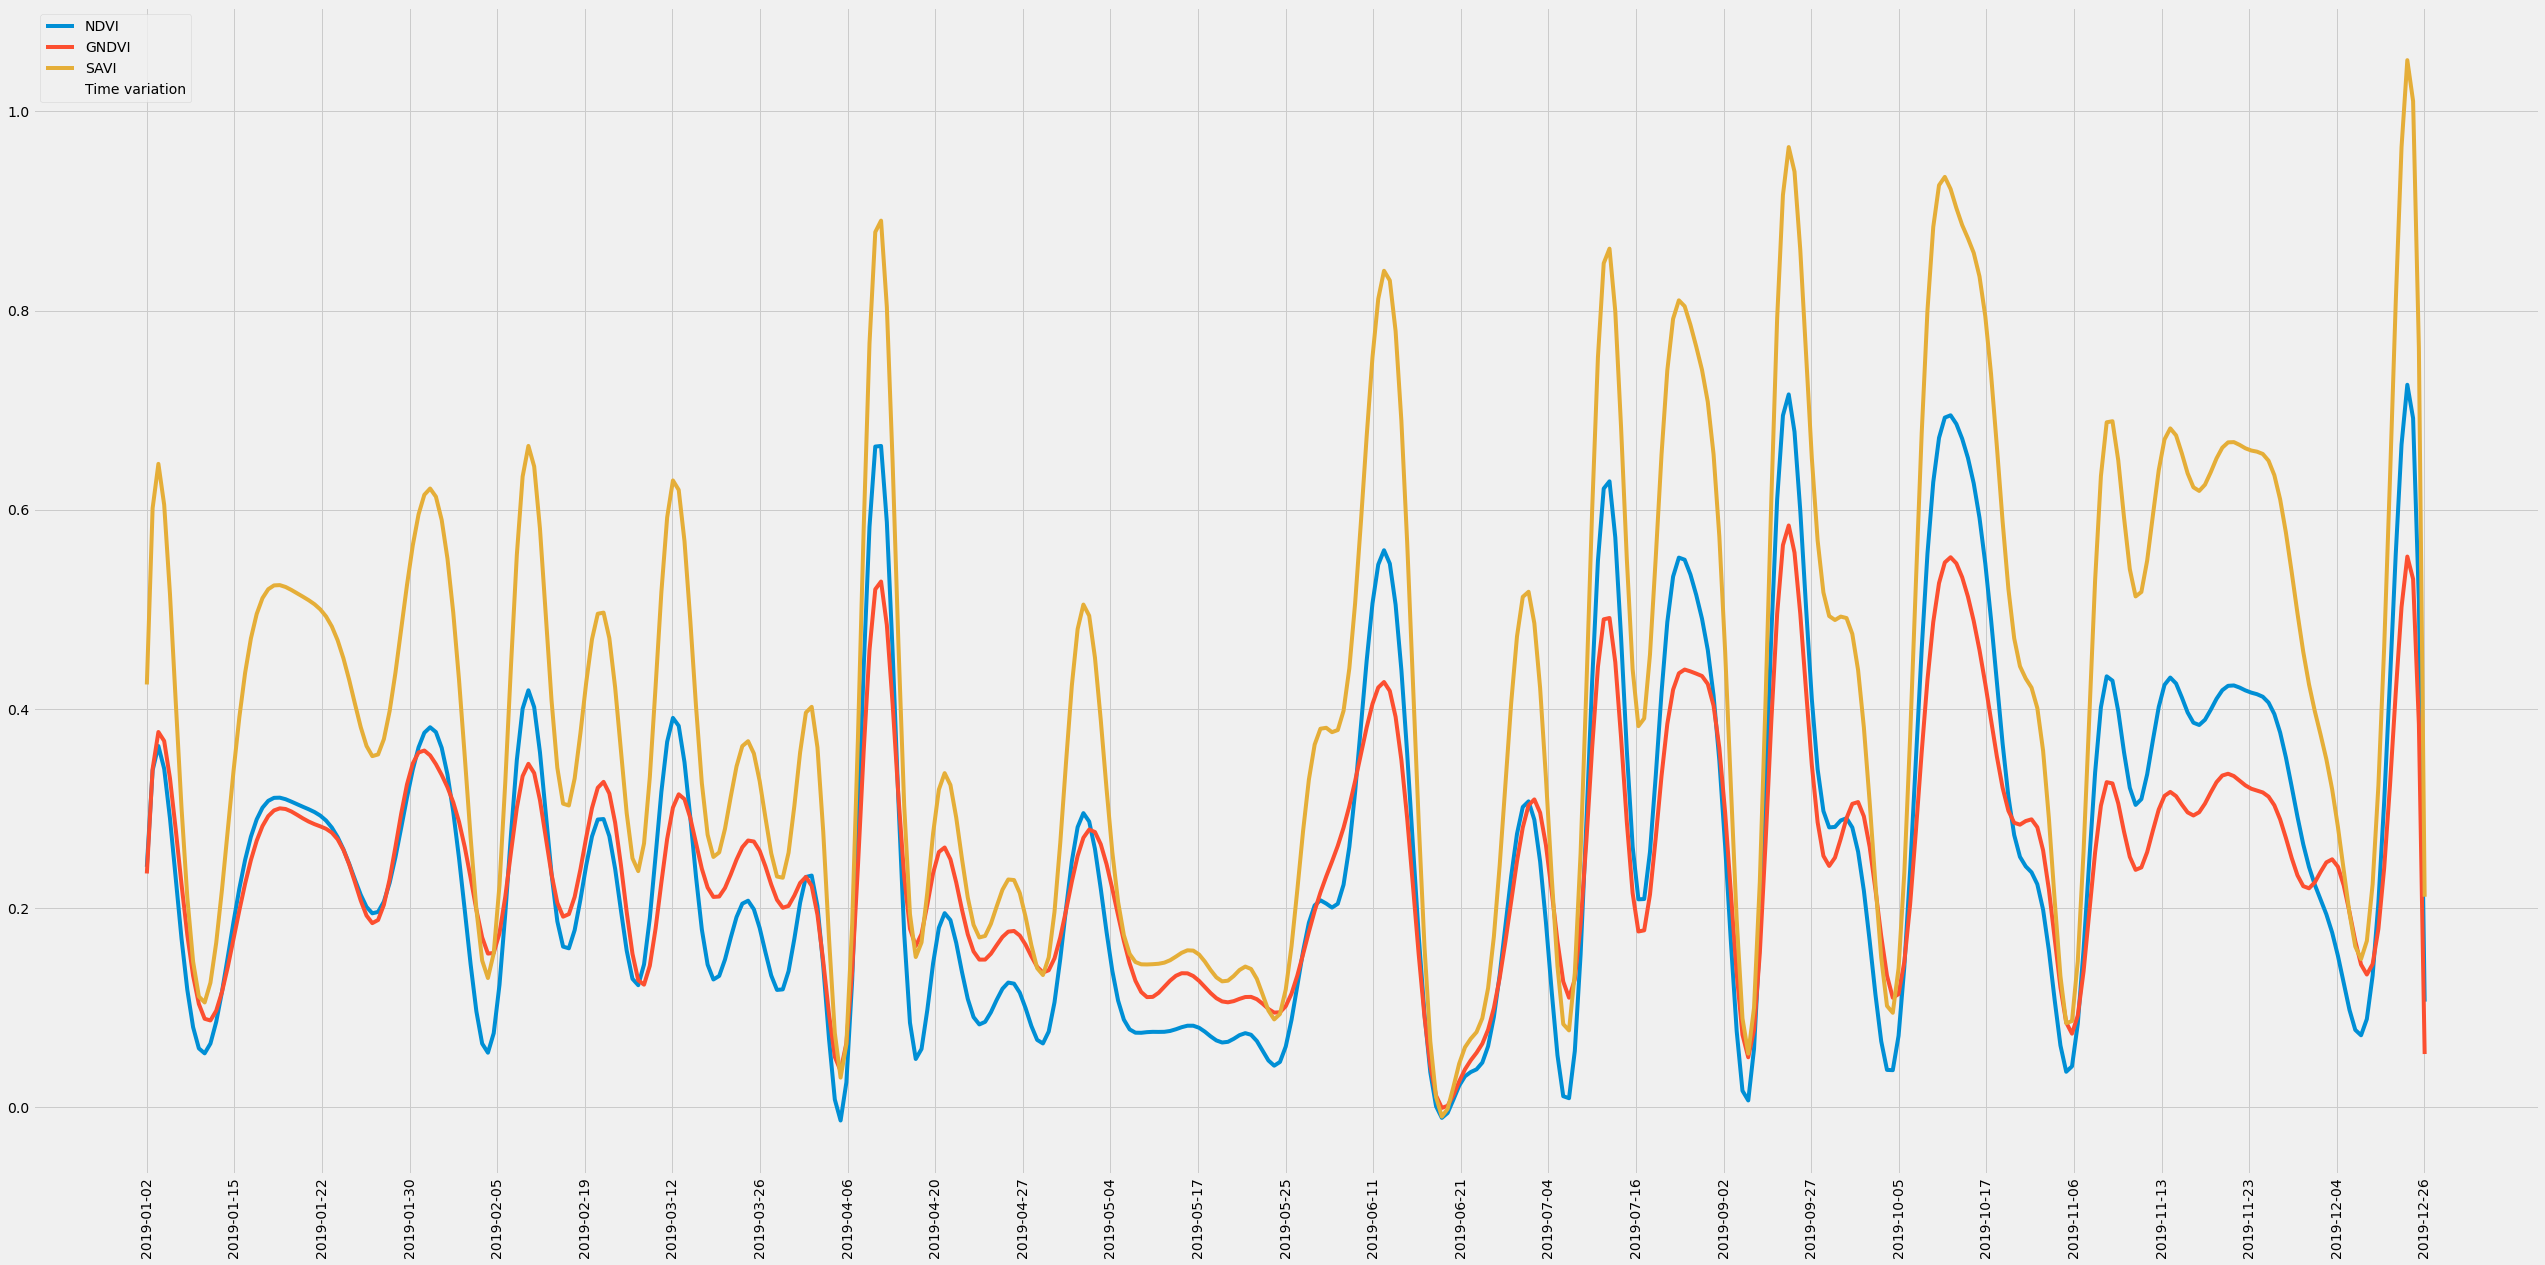

In [ ]:
#Smooth profile for the NDVI, GNDVI, SAVI indices 2019

fig, axs = plt.subplots(1, 1, figsize=(40, 20))

x = df_2019.date
y = df_2019.NDVI
v = df_2019.GNDVI
w = df_2019.SAVI

x_new = np.linspace(0, len(df_2019.date), 400)

a_BSpline = make_interp_spline([i for i in range(0, len(df_2019.date))], df_2019.NDVI, k=5,)
b_BSpline = make_interp_spline([i for i in range(0, len(df_2019.date))], df_2019.GNDVI, k=5,)
c_BSpline = make_interp_spline([i for i in range(0, len(df_2019.date))], df_2019.SAVI, k=5,)

y_new = a_BSpline(x_new)
v_new = b_BSpline(x_new)
w_new = c_BSpline(x_new)

axs.plot(x_new[:-5], y_new[:-5],"-",label="NDVI")
axs.plot(x_new[:-5], v_new[:-5],"-",label="GNDVI")
axs.plot(x_new[:-5], w_new[:-5],"-",label="SAVI")

x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="Time variation")
xt = [x[i] for i in range(0,len(x),3)]
plt.xticks(xt,rotation="vertical")
plt.legend()

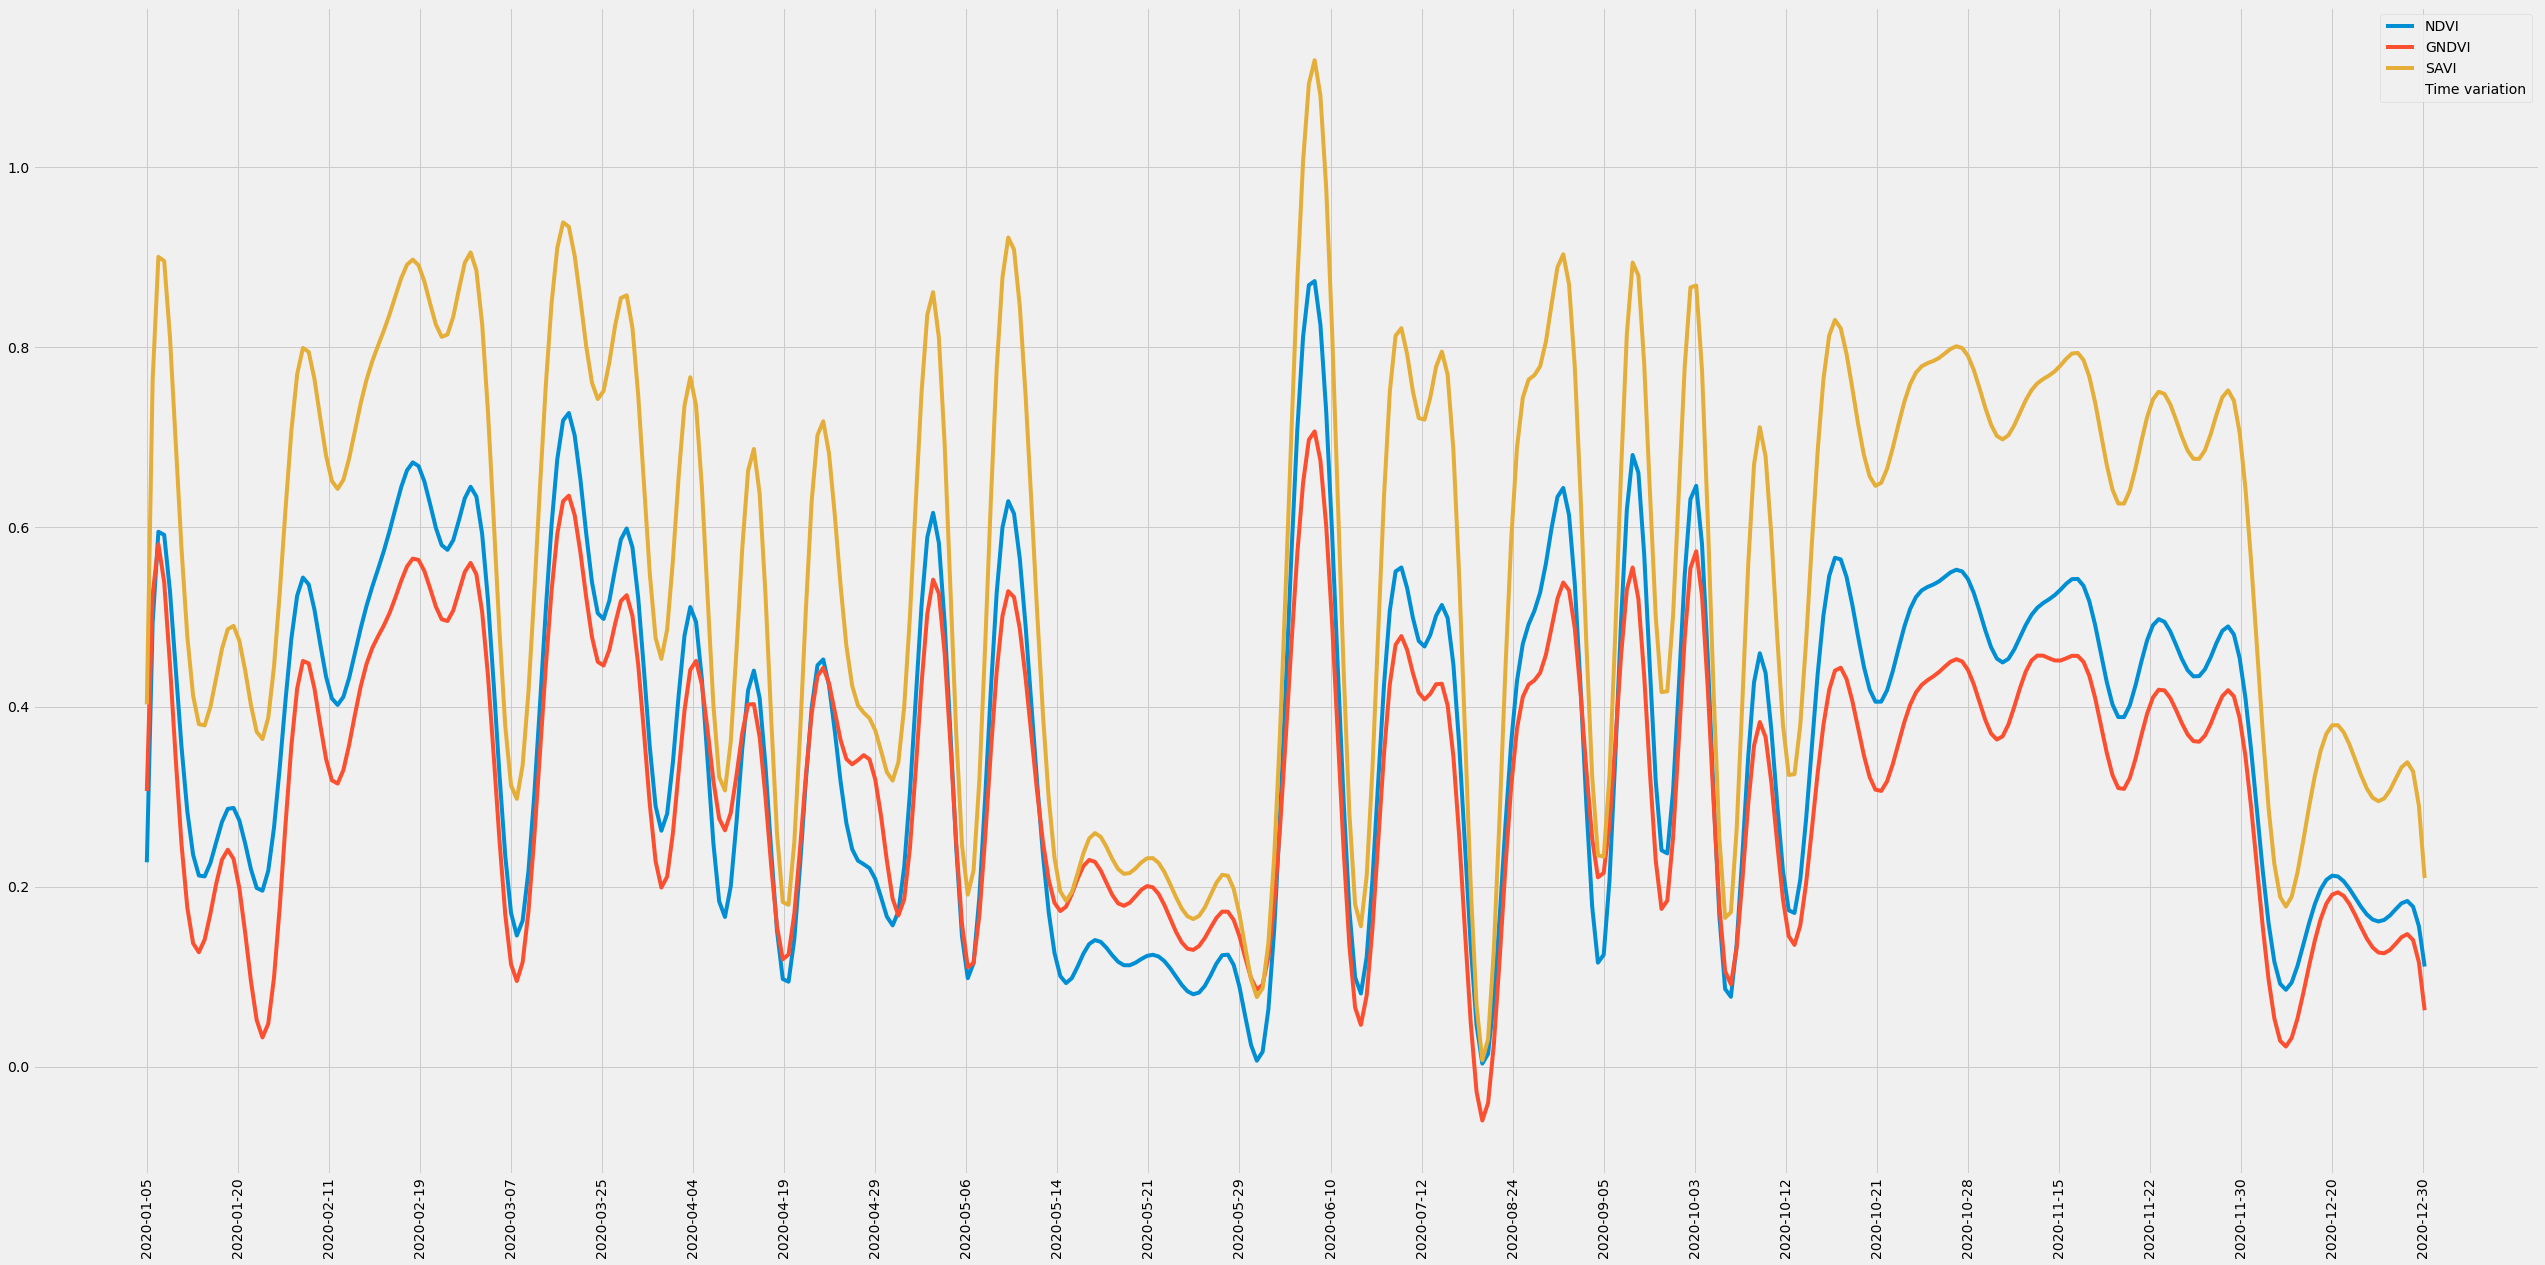

In [ ]:
#Smooth profile for the NDVI, GNDVI, SAVI indices 2020

fig, axs = plt.subplots(1, 1, figsize=(40, 20))

x = df_2020.date
y = df_2020.NDVI
v = df_2020.GNDVI
w = df_2020.SAVI

x_new = np.linspace(0, len(df_2020.date), 400)

a_BSpline = make_interp_spline([i for i in range(0, len(df_2020.date))], df_2020.NDVI, k=5,)
b_BSpline = make_interp_spline([i for i in range(0, len(df_2020.date))], df_2020.GNDVI, k=5,)
c_BSpline = make_interp_spline([i for i in range(0, len(df_2020.date))], df_2020.SAVI, k=5,)

y_new = a_BSpline(x_new)
v_new = b_BSpline(x_new)
w_new = c_BSpline(x_new)

axs.plot(x_new[:-5], y_new[:-5],"-",label="NDVI")
axs.plot(x_new[:-5], v_new[:-5],"-",label="GNDVI")
axs.plot(x_new[:-5], w_new[:-5],"-",label="SAVI")

x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="Time variation")
xt = [x[i] for i in range(0,len(x),3)]
plt.xticks(xt,rotation="vertical")
plt.legend()

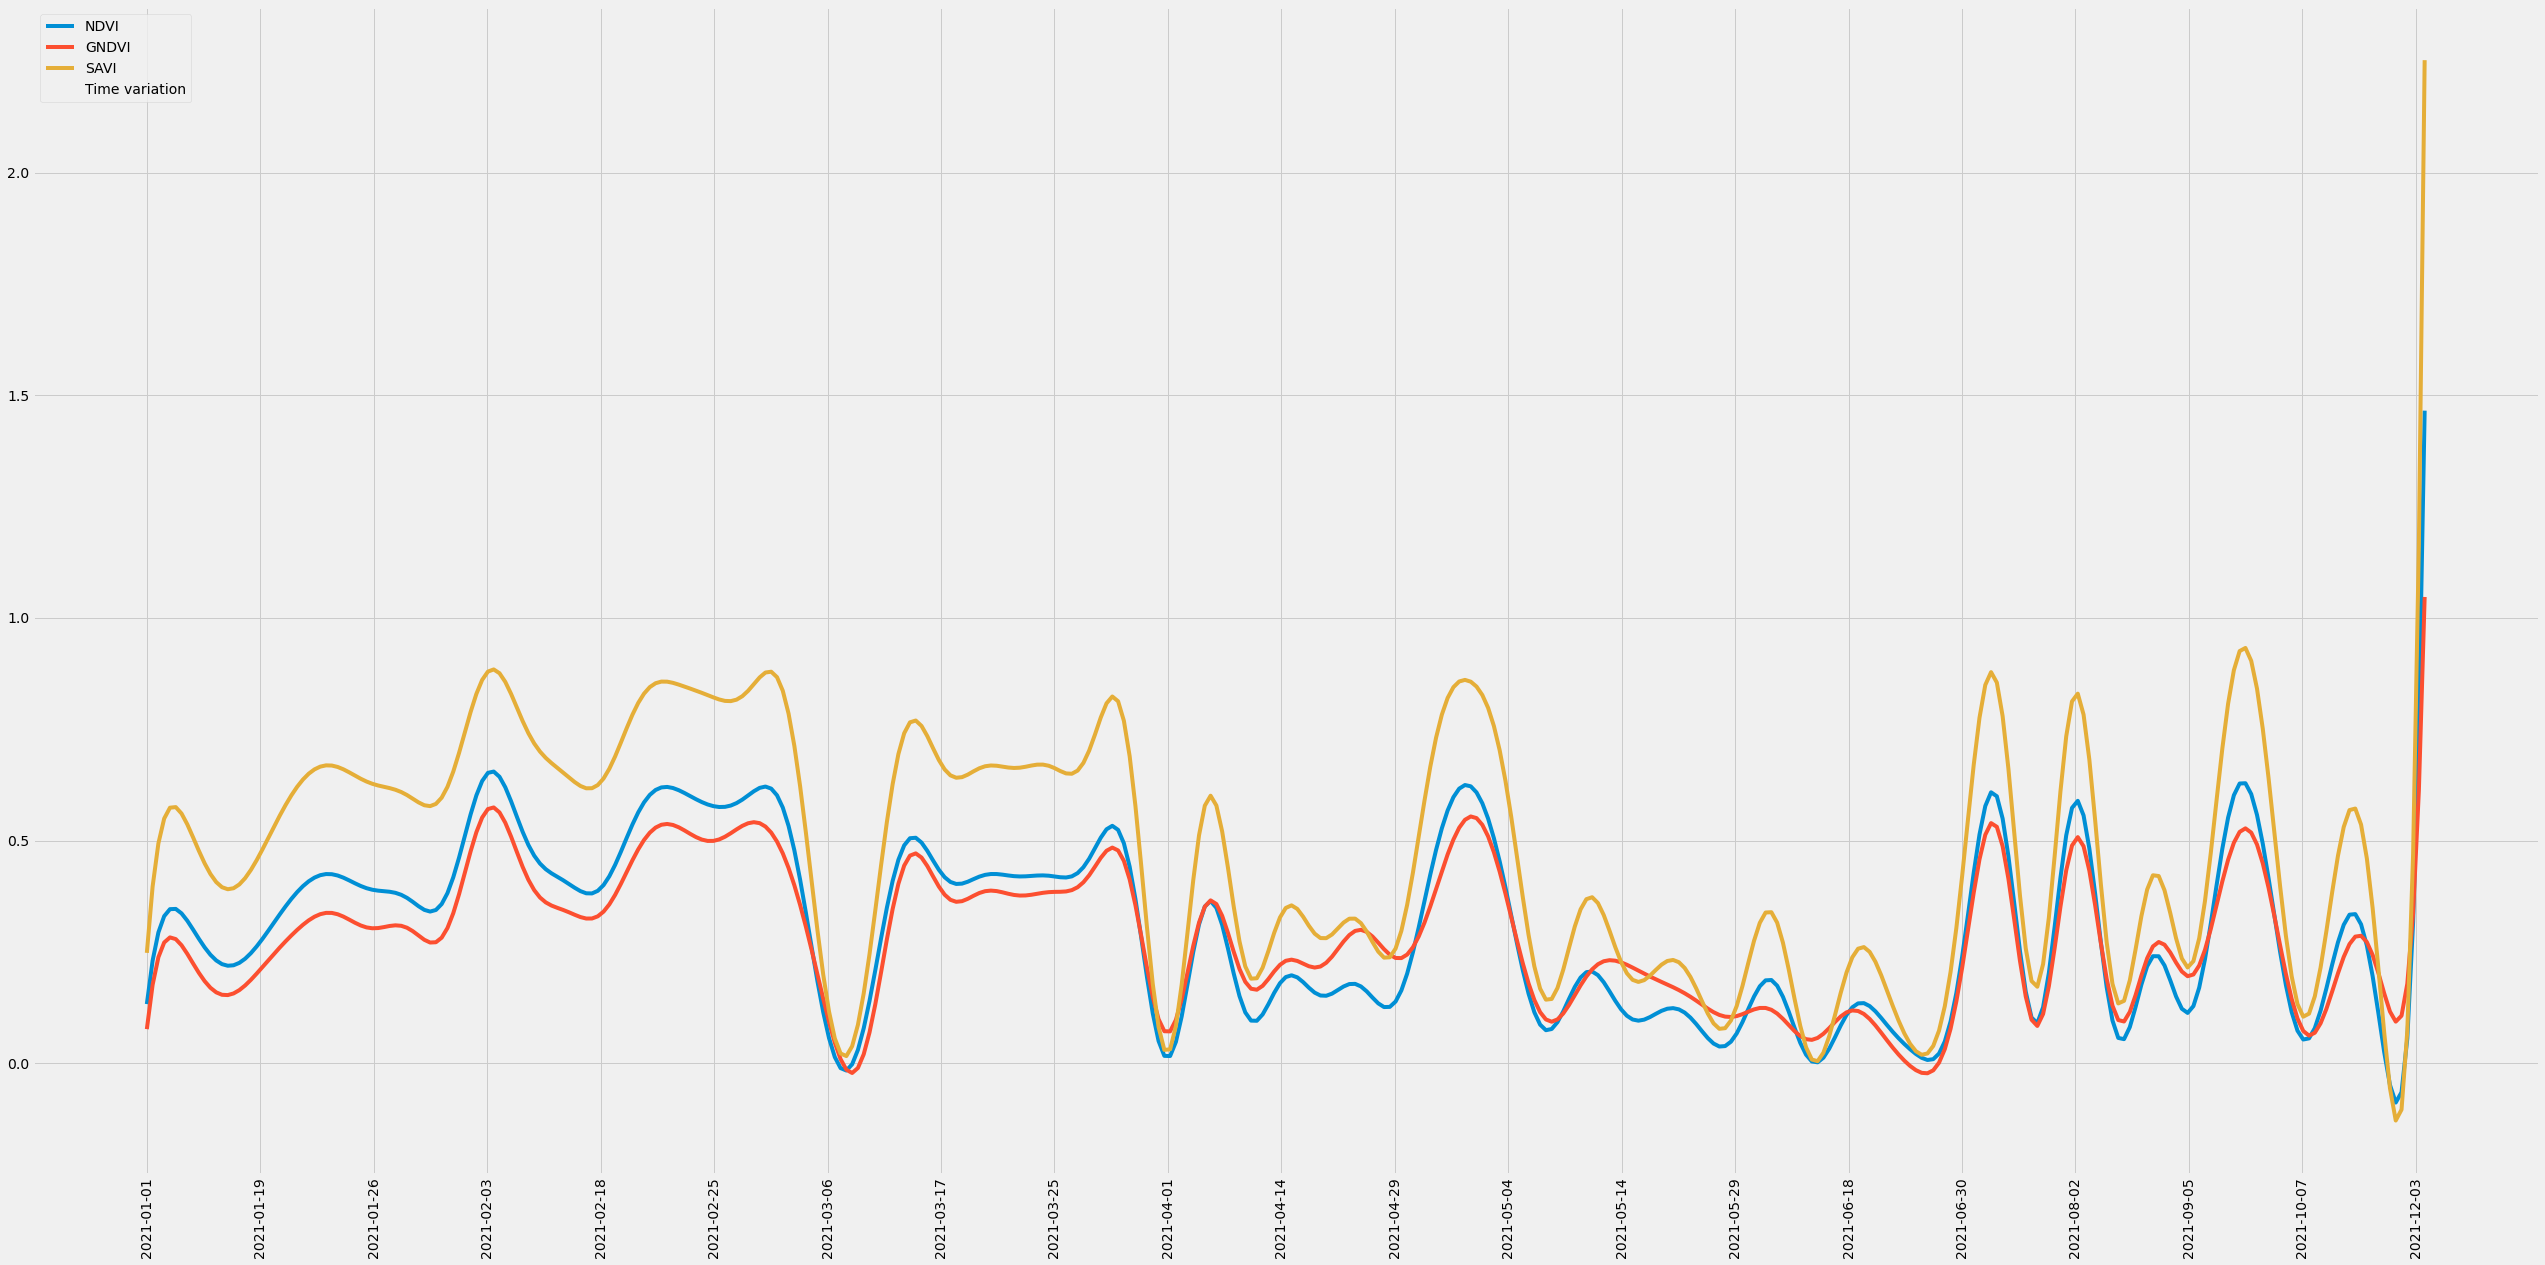

In [ ]:
#Smooth profile for the NDVI, GNDVI, SAVI indices 2021

fig, axs = plt.subplots(1, 1, figsize=(40, 20))

x = df_2021.date
y = df_2021.NDVI
v = df_2021.GNDVI
w = df_2021.SAVI

x_new = np.linspace(0, len(df_2021.date), 400)

a_BSpline = make_interp_spline([i for i in range(0, len(df_2021.date))], df_2021.NDVI, k=5,)
b_BSpline = make_interp_spline([i for i in range(0, len(df_2021.date))], df_2021.GNDVI, k=5,)
c_BSpline = make_interp_spline([i for i in range(0, len(df_2021.date))], df_2021.SAVI, k=5,)

y_new = a_BSpline(x_new)
v_new = b_BSpline(x_new)
w_new = c_BSpline(x_new)

axs.plot(x_new[:-5], y_new[:-5],"-",label="NDVI")
axs.plot(x_new[:-5], v_new[:-5],"-",label="GNDVI")
axs.plot(x_new[:-5], w_new[:-5],"-",label="SAVI")

x = list(x.astype(str))
axs.plot(x, y, linestyle=" ", alpha=0.75, label="Time variation")
xt = [x[i] for i in range(0,len(x),3)]
plt.xticks(xt,rotation="vertical")
plt.legend()